# **Análisis del dataset de las campañas de comercialización de los bancos**

### **Resumen**

Es un dataset que describen los resultados de las campañas de marketing del banco de Portugal. Las campañas realizadas se basaban principalmente en llamadas telefónicas directas, ofreciendo a los clientes del banco la posibilidad de hacer un depósito a plazo. Si después de todos los esfuerzos de marcado el cliente había aceptado hacer el depósito - la variable objetivo marcaba "sí", de lo contrario "no".

Fuente de datos: https://archive.ics.uci.edu/ml/datasets/bank+marketing


**Citación:**

Este dataset está disponible públicamente para la investigación. Los detalles se describen en S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing." Decision Support Systems, Elsevier, 62:22-31, June 2014 

#### **Objetivo**

* Predecir los resultados futuros de las empresas de comercialización en base a las estadísticas disponibles y, en consecuencia, formular recomendaciones para dichas empresas en el futuro.
* Construir un perfil de un consumidor de servicios bancarios (depósitos).

#### **Metodología**

Para completar el objetivo se realizarán las siguientes secciones de tareas que se detallan en el script:
1. Cargar los datos y previsualizarlos. División de registros en conjunto de entrenamiento y de prueba
2. Análisis Exploratorio de los Datos (AED) 

3. Preprocesamiento de los datos. 

4. Procesamiento

5. Modelamiento 

 > ****** usamos intencionalmente la mayoría de los modelos de Machine Learning para aumentar el nivel de interpretación de la solución

##### **Fuentes**

Las fuentes y notebooks consultados han sido las siguientes: 

[1] https://github.com/RumanaSk/Bank-Marketting-Campaign-Analysis/blob/master/NOTEBOOK.ipynb

[2] https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset-analysis

[3] https://github.com/Ktk25/Bank-Marketing-Campaign-Assignment---UpGrad/blob/master/Bank%20Marketing%20Campaign%20Assignment%20-%20UpGrad.ipynb

[4] https://github.com/systemoperator/ml-project/blob/571149af797783354d29a3f2d2423e60a7561fe7/notebooks/1-cleaning.ipynb

[5] https://github.com/search?l=Jupyter+Notebook&p=7&q=bank-additional-full.csv&type=Code


![Lista de variables del conjunto de datos:](https://github.com/josetorresob/INF648/blob/master/Lista%20de%20Variables.jpg?raw=true)

## **1era Sección: Descargar base de datos, visualización de registros y división en conjunto de entrenamiento y de prueba**


In [4]:
#Descargamos el archivo del dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -o bank-additional.zip

--2020-07-20 00:21:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  2.37MB/s    in 0.2s    

2020-07-20 00:21:48 (2.37 MB/s) - ‘bank-additional.zip’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/

In [1]:
#cargamos las librerías y paquetes que vamos a utilizar
import warnings
warnings.filterwarnings("ignore")
#evitamos los warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import datasets

pd.set_option("display.max_columns", 50)

%matplotlib inline

# Cargar Data

In [2]:
train_url = './bank-additional/bank-additional-full.csv'
dataset = pd.read_csv(train_url, delimiter=";")
#Trabajamos con el dataset completo

display(dataset.head(5))
print('\n Hay {} observaciones con {} características'.format(*dataset.shape))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



 Hay 41188 observaciones con 21 características


In [3]:
#Dividimos el dataset en un conjunto de entranmiento y un conjunto de prueba (25%)
dataset_train, dataset_test= train_test_split(dataset, test_size=0.25, random_state=0)

In [4]:
display(dataset_train.head(5))
print('\n Hay {} observaciones con {} características'.format(*dataset_train.shape))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10685,52,blue-collar,divorced,high.school,no,no,no,telephone,jun,tue,676,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes
224,40,technician,married,basic.9y,no,no,no,telephone,may,mon,168,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
29638,28,self-employed,single,university.degree,no,yes,no,cellular,apr,mon,187,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4804,52,technician,married,high.school,unknown,no,no,telephone,may,wed,68,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
11614,35,blue-collar,single,basic.6y,no,no,no,telephone,jun,fri,81,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no



 Hay 30891 observaciones con 21 características


In [6]:
display(dataset_test.head(5))
print('\n Hay {} observaciones con {} características'.format(*dataset_test.shape))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15500,39,blue-collar,married,basic.9y,no,yes,no,cellular,jul,fri,635,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes
29034,55,blue-collar,married,basic.4y,no,yes,no,cellular,apr,fri,248,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
11199,39,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,thu,207,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
22247,56,self-employed,married,basic.9y,no,yes,no,cellular,aug,thu,176,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
27180,49,blue-collar,married,basic.9y,no,yes,no,cellular,nov,fri,271,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no



 Hay 10297 observaciones con 21 características


In [5]:
#revisamos si existen valores nulos/missing en el conjunto de datos
def get_missing_values(df): 
    """
      - Funcción para obtener los valores nulos y su porcentaje
      - @author: grupo ML
    """

    columns = {0 : 'N° Valores nulos', 1 : '% of Total de Valores'}
    missing_value_sum = df.isnull().sum()
    missing_value_per = 100 * df.isnull().sum()/len(df)

    return pd.concat(
        [missing_value_sum, missing_value_per], 
        axis=1
        ).rename(columns=columns)

In [6]:
get_missing_values(dataset_train)

,N° Valores nulos,% of Total de Valores
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


In [17]:
get_missing_values(dataset_test)

,N° Valores nulos,% of Total de Valores
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


In [18]:
#creamos la función obtener duplicados
def get_duplicates(df):
    """
      - Funcción para obtener el número de valores nulos
      - @author: grupo ML
    """
    return list(map(lambda i, j: i - j, df.shape, df.drop_duplicates().shape))[0]

In [19]:
print('Hay ' + str(get_duplicates(dataset_train)) + ' filas duplicadas en el dataset de entrenamiento') 

Hay 6 filas duplicadas en el dataset de entrenamiento


In [20]:
print('Hay ' + str(get_duplicates(dataset_test)) + ' filas duplicadas en el dataset de prueba') 

Hay 1 filas duplicadas en el dataset de prueba


### **2da Sección: Análisis exploratorio de los datos**

In [21]:
# Mostrar descripción estadistica para variables continuas
dataset_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30891.000000,30891.000000,30891.000000,30891.00000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,39.965848,257.762714,2.562008,962.51481,0.171474,0.081878,93.576382,-40.498602,3.621842,5166.972529
std,10.424467,259.403625,2.767311,186.81696,0.492702,1.573389,0.579168,4.632345,1.735030,72.435117
min,17.000000,0.000000,1.000000,0.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.00000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.00000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.00000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.00000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
# Mostrar rstadisticod descriptivos de las variables categóricas
categorical_variables = dataset_train.loc[:, dataset_train.dtypes == object].columns

dataset_train[categorical_variables].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,30891,30891,30891,30891,30891,30891,30891,30891,30891,30891,30891
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,7862,18648,9148,24458,16161,25494,19642,10275,6478,26704,27409


In [23]:
print("Variables categóricas: ", "\n")

for c in categorical_variables:
  print("Variable: ", c)
  print(list(pd.unique(dataset_train[c])))
  print("\n")

Variables categóricas:  

Variable:  job
['blue-collar', 'technician', 'self-employed', 'admin.', 'services', 'unemployed', 'entrepreneur', 'retired', 'management', 'student', 'unknown', 'housemaid']


Variable:  marital
['divorced', 'married', 'single', 'unknown']


Variable:  education
['high.school', 'basic.9y', 'university.degree', 'basic.6y', 'basic.4y', 'professional.course', 'unknown', 'illiterate']


Variable:  default
['no', 'unknown', 'yes']


Variable:  housing
['no', 'yes', 'unknown']


Variable:  loan
['no', 'yes', 'unknown']


Variable:  contact
['telephone', 'cellular']


Variable:  month
['jun', 'may', 'apr', 'aug', 'jul', 'nov', 'mar', 'sep', 'oct', 'dec']


Variable:  day_of_week
['tue', 'mon', 'wed', 'fri', 'thu']


Variable:  poutcome
['nonexistent', 'failure', 'success']


Variable:  y
['yes', 'no']




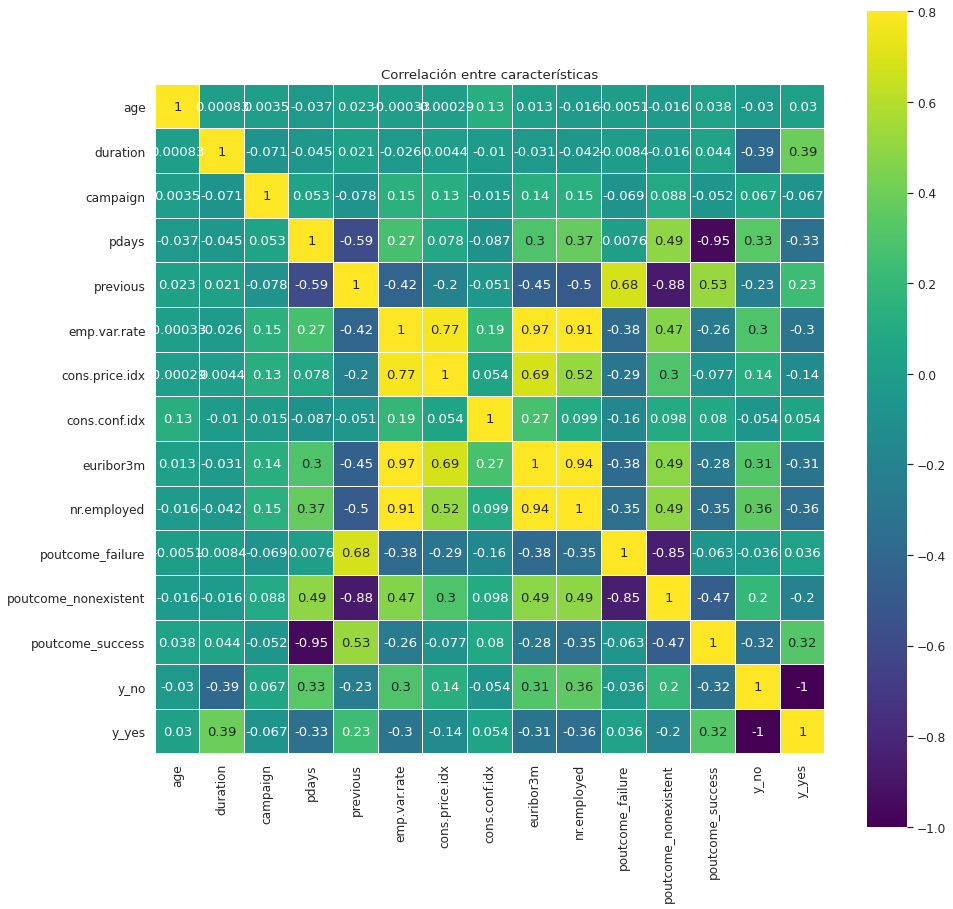

In [24]:
# Correlación entre las variables continuas
# Se tomó el código base de la fuente [1] y se adaptó al caso

# heat map
df_with_dummies = pd.get_dummies(dataset_train.drop([col for col in categorical_variables if col not in ['y', 'poutcome']], axis=1))
corrMatrix = df_with_dummies.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlación entre características');


Descripción:
En el gráfico anterior se observa que existen relaciones fuertes entre pocas variables. 
La gradiente de colores del heat map muestra la fuerza de las relaciones, donde los colores cercanos al amarillo muestran relaciones de asociación positiva, mientras que colores más púrpuras presentan lo opuesto (correlaciones negativas).
Se observa que existe una relación, positiva, fuerte entre las variables "emp.var.rate" con "nr.employed" y "euribor3m".  

Nota: La mitad de variables del conjunto de datos son de naturaleza "categórica" y el análisis estadístico descriptivo es más reducido.


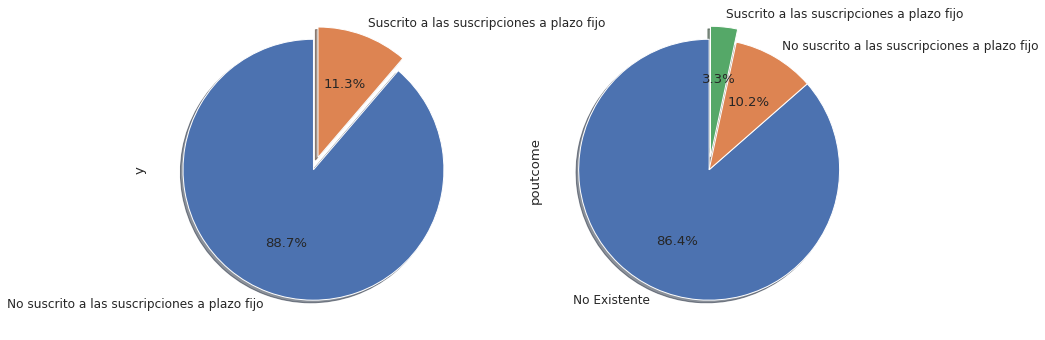

In [25]:
fig, axs = plt.subplots(1,2, figsize=(13,6))

labels = "No suscrito a las suscripciones a plazo fijo", "Suscrito a las suscripciones a plazo fijo"
dataset_train.y.value_counts().plot.pie(explode = [0,0.1], labels = labels, 
                             ax=axs[0], autopct='%1.1f%%', shadow = True, startangle = 90)

labels = "No Existente", "No suscrito a las suscripciones a plazo fijo", "Suscrito a las suscripciones a plazo fijo"
dataset_train.poutcome.value_counts().plot.pie(explode = [0,0,0.1], labels = labels, 
                             ax=axs[1], autopct='%1.1f%%', shadow = True, startangle = 90)

plt.show()

**Análisis de las variables categóricas**

Primero comenzamos el análisis exploratorio de las variables categóricas y vemos cuáles son 
las categorías y si hay algún valor faltante para estas categorías. 
Aquí, usamos sns para crear los gráficos de barras de abajo.

> ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'response']

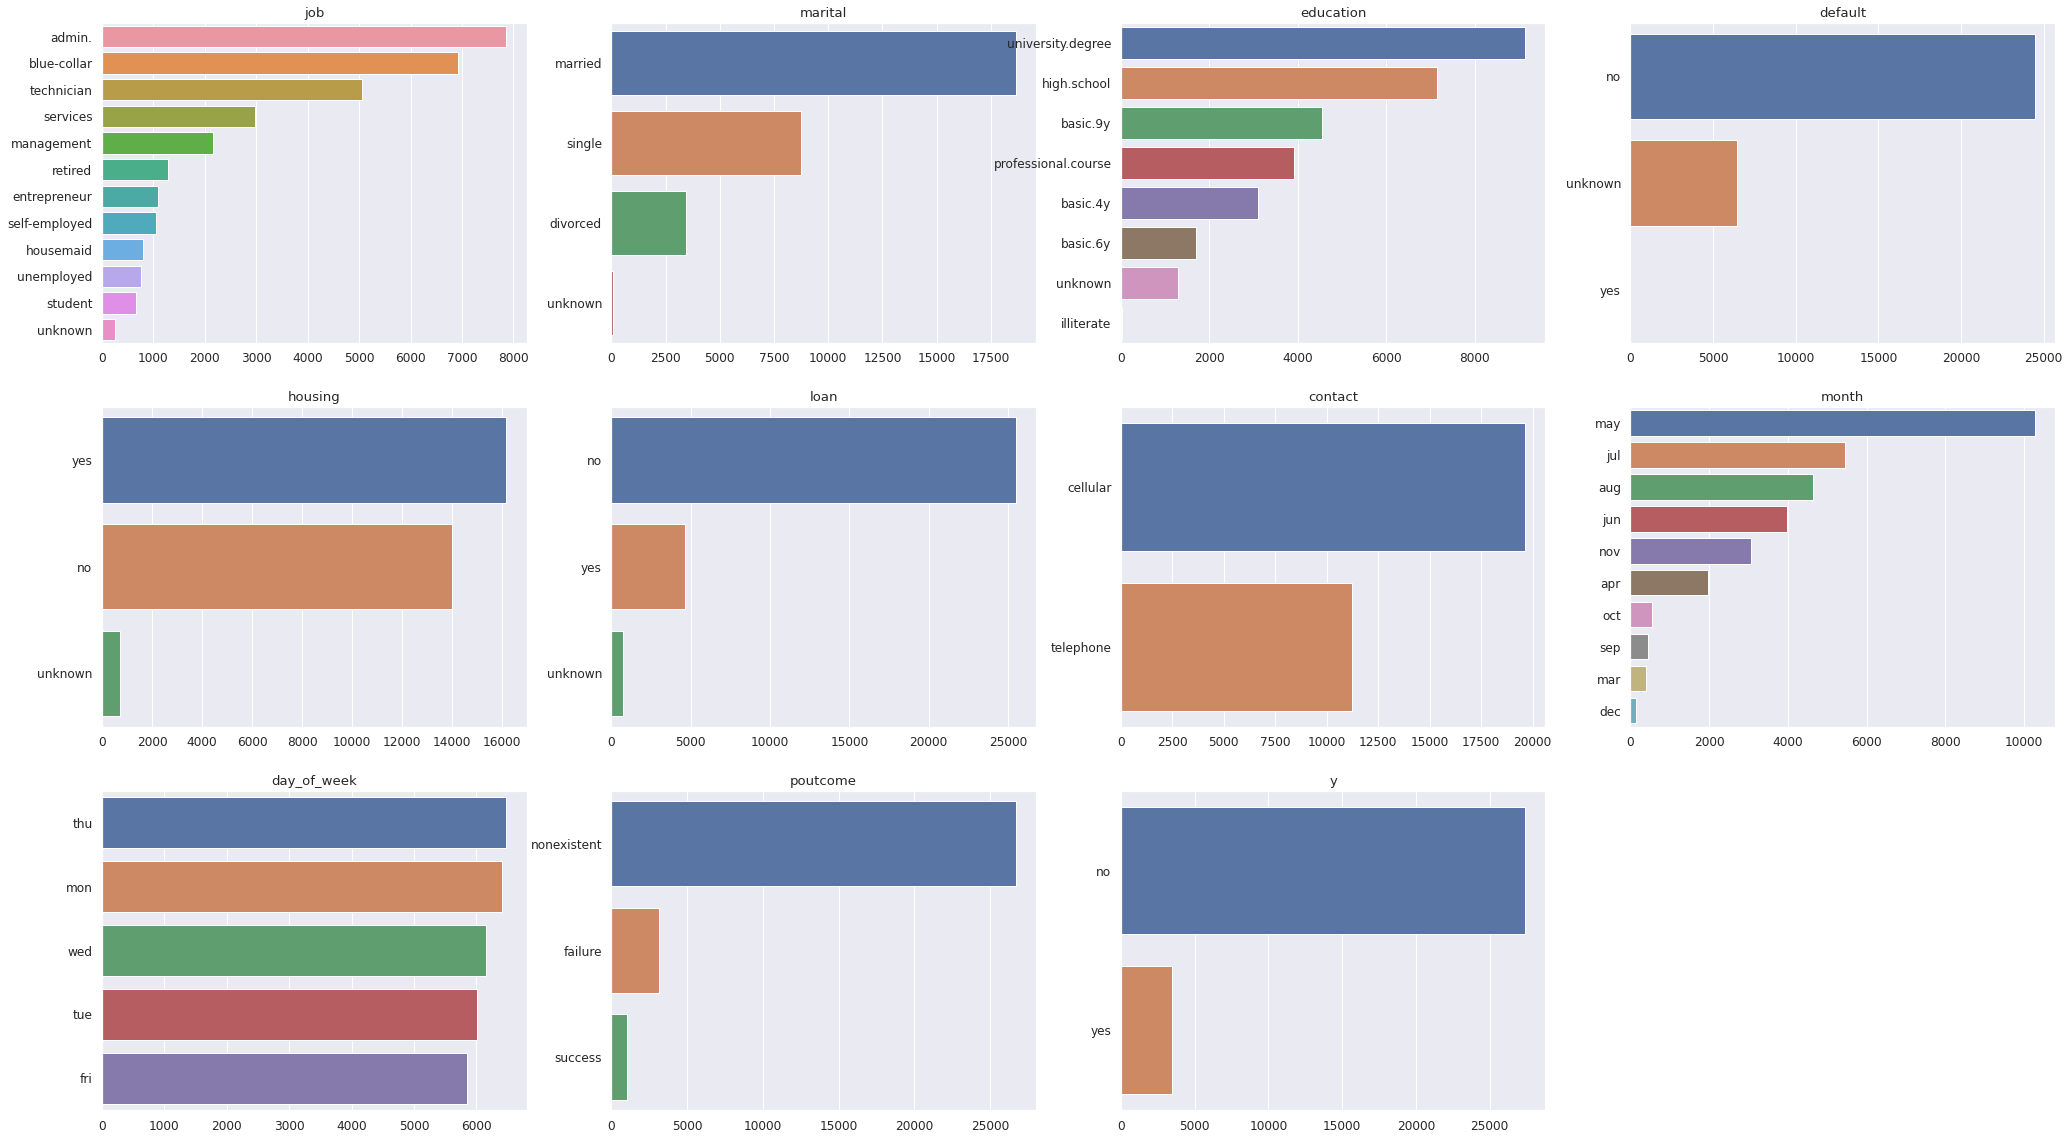

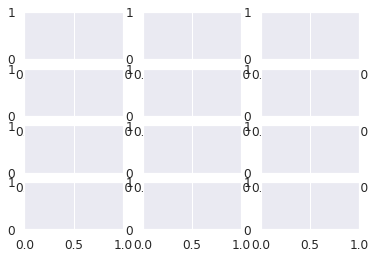

In [26]:
fig = plt.figure(figsize = (35,20))
ax = plt.subplots(4, 3)
for i, cat in enumerate(categorical_variables, 1):
    ax = fig.add_subplot(3, 4, i)
    sns.barplot(dataset_train[cat].value_counts().values, dataset_train[cat].value_counts().index, ax = ax)
    ax.title.set_text(cat)


Hay valores etiquetados como "unknown" para muchas variables en el conjunto de datos. 
Hay muchas maneras de manejar los datos que faltan. Una de ellas es descartar 
la fila pero eso llevaría a la reducción del conjunto de datos y por lo tanto 
no serviría a nuestro propósito de construir un modelo de predicción preciso y realista.


In [28]:
pd.crosstab(dataset_train.job, dataset_train.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,59,107,368,2504,1,261,4379,183
blue-collar,1719,1069,2734,653,7,340,66,342
entrepreneur,99,54,162,172,2,106,456,43
housemaid,365,56,67,130,1,43,105,35
management,69,59,125,219,0,63,1532,86
retired,446,55,111,204,3,182,209,75
self-employed,67,17,168,87,2,123,566,24
services,105,169,293,2021,0,158,129,106
student,23,9,74,273,0,32,126,125


### **3era Sección: Preprocesamiento de los datos**

Se realizaron hipótesis sobre los factores (características) individuales y su relación con la variable target. La intuición sobre el comportamiento de las variables y sus categorías nos ayudó para llevar a cabo una correcta depuración de los datos y la preparación de los datos para la modelización.

In [7]:
#utilizamos la función para identificar cuantos registros con la etiqueta "unknown" existen en cada característica
def get_unknown_colums(df):
    """
      - Funcción para obtener las columnas con el valor unknown
      - @author: grupo ML
    """
    columns_with_unknown_values = []

    for col in df.columns:
        num_entries = len(df[df[col] == 'unknown'])
        if num_entries > 0:
            columns_with_unknown_values += [col]
            print('Columna "' + col + '" tiene ' + str(num_entries) + ' entradas unknown.')
            
    if len(columns_with_unknown_values) == 0:
        print('no se encontraron columnas con unknown')
      
    return columns_with_unknown_values

In [8]:
get_unknown_colums(dataset_train)

Columna "job" tiene 248 entradas unknown.
Columna "marital" tiene 60 entradas unknown.
Columna "education" tiene 1291 entradas unknown.
Columna "default" tiene 6431 entradas unknown.
Columna "housing" tiene 734 entradas unknown.
Columna "loan" tiene 734 entradas unknown.


['job', 'marital', 'education', 'default', 'housing', 'loan']

### Sobre la imputación de los datos faltantes ("unknown")

En este sección hemos utilizado parte de la intuición de imputación la fuente de los notebooks [2] y [3]. A su vez, también se aplican métodos de imputación utilizando estadísticos de tendencia central (moda, mediana, media).

Compartimos la presunción de que la variable "job" (empleo) está influenciada por el (nivel educativo) "education" de una persona. En ese sentido
Por lo tanto, podemos inferir "job" basado en la "education" de la persona.

Infiriendo la educación de los trabajos: De la tabulación cruzada, 
se puede ver que las personas con trabajos de gestión/administración suelen tener un un título universitario. 

Por lo tanto, donde 'job' = management and 'education' = unknown,
 podemos sustituir 'education' with 'university.degree'.  
 De manera similar, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

Entendiendo que los empleos catalogados como "blue collar" son básicamente trabajos manuales donde no se requiere mucha calificación es que convenimos en utilizar  las categorías más bajas de la variable nivel de educación para imputar los valores unknown en la variable "job" y colocar "blue collar".  
Infiriendo los trabajos desde la educación: 
If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' 
then the 'job' is usually 'blue-collar'. 
Una última casuística se relaciona con el nivel educativo "formación profesional"  para imputar la categoría "technician" en la variable empleo.
If 'education' = 'professional.course', then the 'job' = 'technician'.

Asimismo, tiene sentido colocar "jubilado" en la población de adultos mayores que no registró su empleo.

Como vemos, if 'age' > 60, 
luego el 'job' is 'retired,' lo que tiene sentido.

Mientras que se imputan los valores para el empleo y el nivel educativo, 
sabíamos que las correlaciones debían tener sentido en el mundo real. 
Si no tenían sentido en el mundo real, no reemplazábamos los valores que faltaban.

> pd.crosstab(dataset.job, dataset.education)

Como podemos ver, somos capaces de reducir el número de incógnitas y mejorar nuestro conjunto de datos.

In [9]:
df1 = dataset_train.copy()

df1['default'] = df1.default.replace('unknown',df1.default.mode([0]))

df1.housing.replace('unknown', df1.housing.mode()[0],inplace=True)

df1['loan'] = df1.default.replace('unknown', df1.loan.mode()[0])

In [10]:
def replace_unknown(df):
    df1 = df.copy()

    df1.loc[(df1['age']>60) & (df1['job']=='unknown'), 'job'] = 'retired'

    df1.loc[(df1['education']=='unknown') & (df1['job']=='management'), 'education'] = 'university.degree'

    df1.loc[(df1['education']=='unknown') & (df1['job']=='services'), 'education'] = 'high.school'

    df1.loc[(df1['education']=='unknown') & (df1['job']=='housemaid'), 'education'] = 'basic.4y'

    df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.4y'), 'job'] = 'blue-collar'

    df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.6y'), 'job'] = 'blue-collar'

    df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.9y'), 'job'] = 'blue-collar'

    df1.loc[(df1['job']=='unknown') & (df1['education']=='professional.course'), 'job'] = 'technician'

    return df1

In [11]:
df1 = replace_unknown(df1)

pd.crosstab(df1.job, df1.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,59,107,368,2504,1,261,4379,183
blue-collar,1751,1085,2758,653,7,340,66,342
entrepreneur,99,54,162,172,2,106,456,43
housemaid,400,56,67,130,1,43,105,0
management,69,59,125,219,0,63,1618,0
retired,449,55,111,204,3,183,210,87
self-employed,67,17,168,87,2,123,566,24
services,105,169,293,2127,0,158,129,0
student,23,9,74,273,0,32,126,125


In [12]:
from sklearn.impute import SimpleImputer

columns_with_unknown_values = get_unknown_colums(df1)

impute_missing = SimpleImputer(missing_values='unknown', strategy='most_frequent')
#Imputamos la moda 

df1[columns_with_unknown_values] = impute_missing.fit_transform(df1[columns_with_unknown_values])

df1[columns_with_unknown_values].head(10)

Columna "job" tiene 150 entradas unknown.
Columna "marital" tiene 60 entradas unknown.
Columna "education" tiene 1064 entradas unknown.
Columna "default" tiene 6431 entradas unknown.


,job,marital,education,default
10685,blue-collar,divorced,high.school,no
224,technician,married,basic.9y,no
29638,self-employed,single,university.degree,no
4804,technician,married,high.school,no
11614,blue-collar,single,basic.6y,no
19300,admin.,single,university.degree,no
155,blue-collar,married,basic.9y,no
40537,admin.,single,high.school,no
13240,blue-collar,divorced,basic.4y,no
22849,services,married,high.school,no


### Relación de cada variable con la duración

La duración se obtiene después de que se hace la llamada al cliente potencial, así que si el cliente objetivo nunca ha recibido llamadas esta característica no es tan útil. La razón por la que la duración está altamente correlacionada con la apertura de un depósito a plazo es que cuanto más hable el banco con un cliente objetivo, mayor será la probabilidad de que éste abra un depósito a plazo, ya que una mayor duración significa un mayor interés (compromiso) por parte del cliente potencial.


Eliminar donde la duración de la llamada fue de menos de 10 segundos


Eliminar 219 filas
[df.duration < 10/60]

> df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)


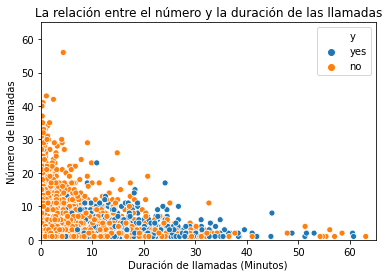

In [13]:
df_sct = df1.copy()

df_sct['pdays'] = np.where(df_sct['pdays'] == 999, df_sct[df_sct['pdays'] < 999]['pdays'].mean(), df_sct['pdays'])

df_sct['duration'] = df_sct['duration'].apply(lambda n:n/60).round(2)

duration_campaign = sns.scatterplot(x='duration', y='campaign', data = df_sct, hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Número de llamadas')
plt.xlabel('Duración de llamadas (Minutos)')
plt.title('La relación entre el número y la duración de las llamadas')
# Annotation
plt.show()

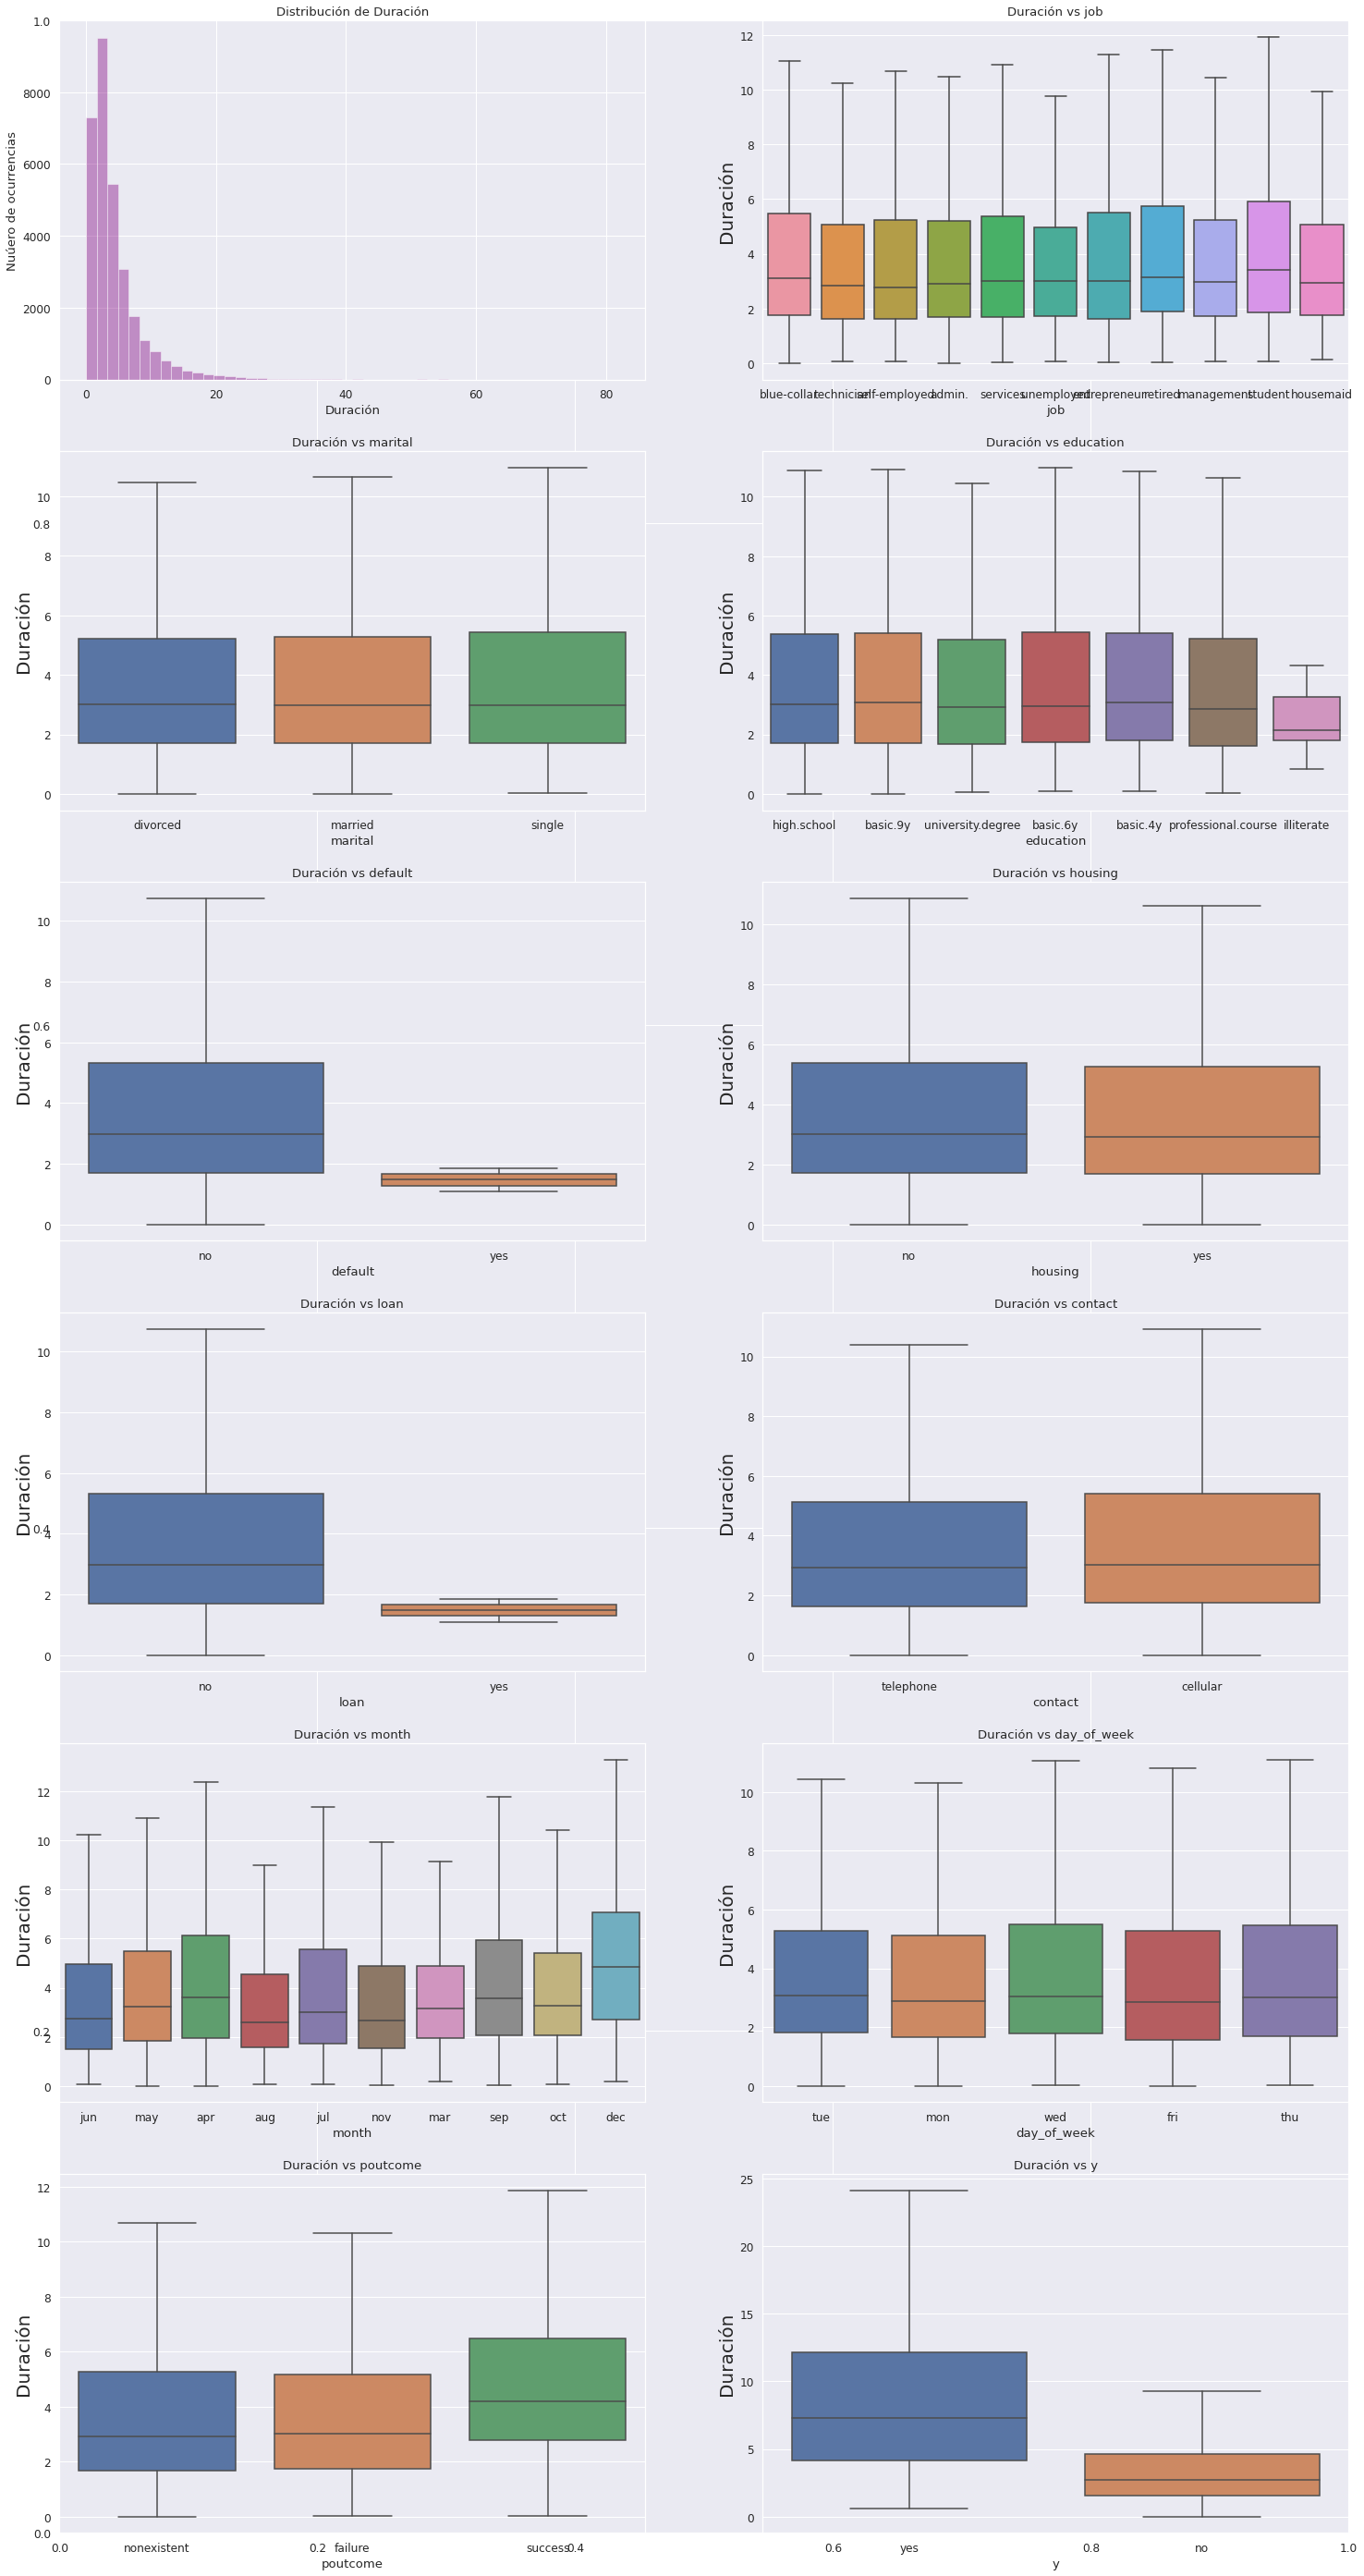

In [38]:
##se realizarán distintas gráficas de dispersión de los cruces de las variables categóricas vs. la variable duración, que resulta ser la más importante en todos los notebooks al respecto.
#se ha utilizado y adaptado el código de la fuente [3]

fig, ax = plt.subplots(figsize=(25,50))

ax = fig.add_subplot(6, 2, 1)
sns.distplot(df_sct['duration'], color="purple", kde=False, ax = ax)
ax.title.set_text("Distribución de Duración")
ax.set_ylabel("Nuúero de ocurrencias")
ax.set_xlabel("Duración");

for i, cat in enumerate(categorical_variables, 1):
    # sns.boxplot(x, y, argument to hide outliers)
    ax = fig.add_subplot(6, 2, i+1)
    sns.boxplot(df_sct[cat], df_sct["duration"], showfliers=False, ax = ax)

    # title for the plot
    ax.title.set_text("Duración vs {}".format(cat))
    ax.set_ylabel("Duración", fontsize = 20)
    ax.set_label(cat)


Análisis:



*   La variable duración es asimétrica. Tiene una distribución sesgada, cola derecha. La mayor cantidad de registros se encuentran en los valores de menor duración. 
*   Job: En relación con el empleo, parece no haber mucha diferencia. En la categoría estudiantes, pareciera haber una mayor duración de las llamadas. Sin embargo, se debería realizar una prueba estadística (diferencia de medias) para determinar si es así.
*    Education: No existe mucha diferencia salvo con la categoría de "illiterate" (sin educación), lo cual tiene sentido con la realidad.
*   Marital: El estado civil no tiene mayor relación con la duración de la llamada.
*  Default: Se puede ver que tiene un crédito en default (no ha pagado) no está dispuesto a escuchar las llamadas de marketing del banco. Esto también tiene sentido pues, el número de llamadas cuando uno es deudor del banco crece de forma muy drástica y llega a hartar.
*  Housing: Los préstamos para vivienda no tienen relación con la duración de la llamada.
*  Loan: Las personas que no tienen préstamos se quedan más tiempo en las llamadas
*  Contact: Parece que las llamadas en los teléfonos celulares duraron más tiempo que las que fueron contestadas en el teléfono fijo.
*  Month: Al parecer, en los meses de diciembre y de abril, las llamadas tienden a durar un poco más. Esto se puede deber al lanzamiento de campañas por fiestas y quizás al pago de las utilidades y bonos.
*  Day_of_week: No hay mayor diferencia entre los días de la semana.


### Relacionar la variable objetivo (y) con variables categóricas

Lista de la frecuencia relativa normalizada de la clase de objetivo por categoría.

Distribución normalizada de cada clase por característica y diferencia trazada entre las frecuencias positivas y negativas. Los valores positivos implican que esta categoría favorece a los clientes que se suscriben y los valores negativos a las categorías que favorecen la no compra del producto.

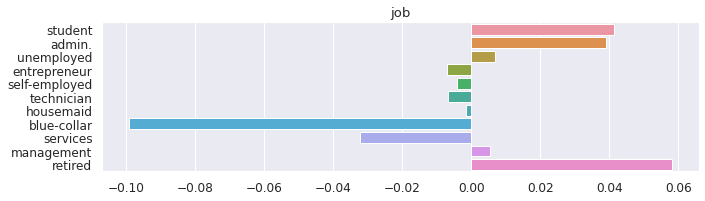

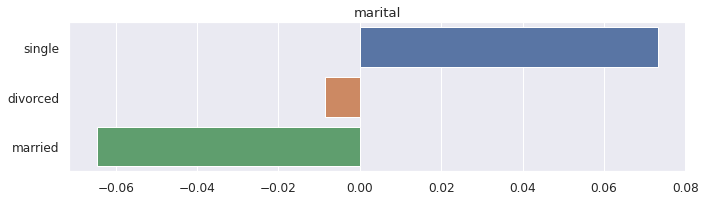

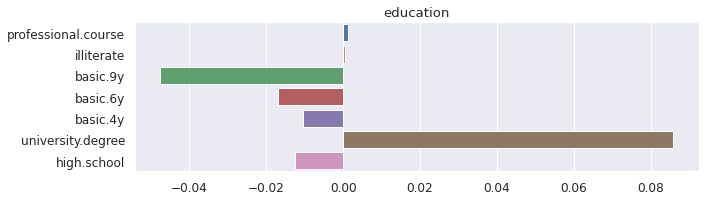

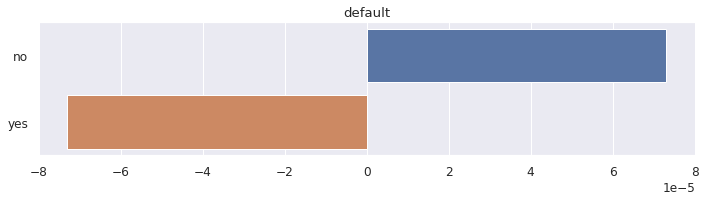

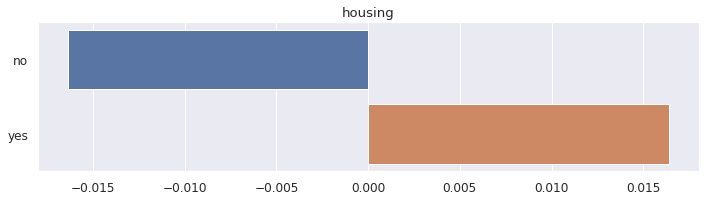

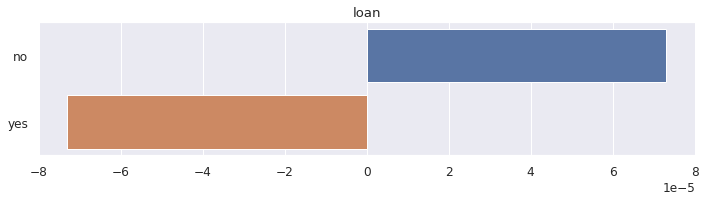

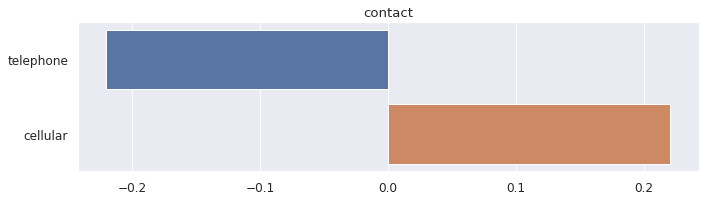

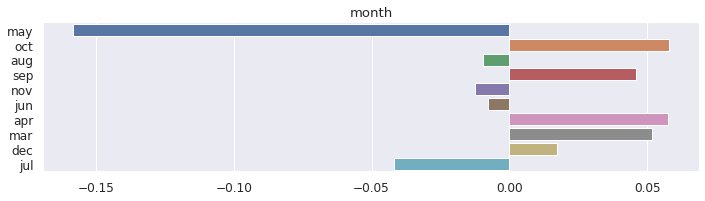

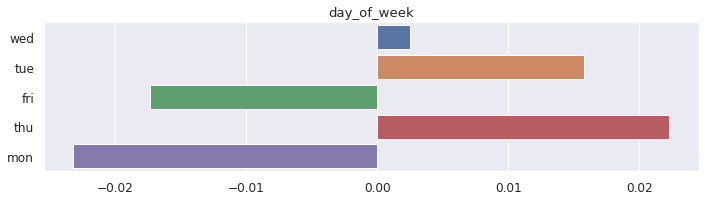

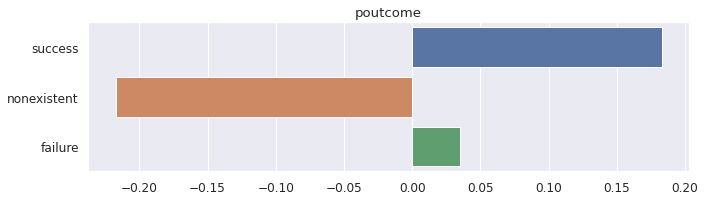

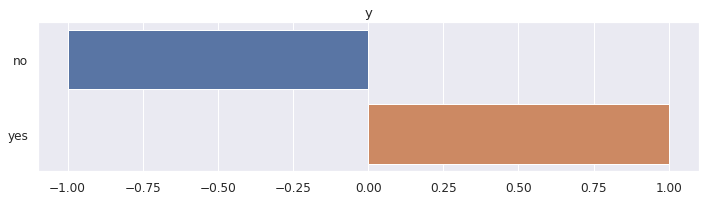

In [39]:
#se ha utilizado y adaptado el código de la fuente [3]
for col in categorical_variables:
    plt.figure(figsize=(10,3))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df_sct.loc[df_sct.y.values == 'yes', col].value_counts() 
    neg_counts = df_sct.loc[df_sct.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df_sct.y.values == 'yes').sum()
    freq_neg = (df_sct.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

### Perspectivas

Aunque estas puntuaciones dan una visión directa y precisa de los datos con respecto a la variable objetivo (y),  no podemos confiar plenamente en estas puntuaciones ya que muchos de los valores están por debajo de 0,1.

*  Job: Los estudiantes, los jubilados y los administradores son más propensos a suscribirse a depósitos a plazo que otras profesiones, 
pero su puntuación normalizada es baja. Es improbable que la gente de cuello de buey se suscriba.
*  Education: Las personas con título universitario son más propensas pero con una puntuación normalizada baja.
*  Marital: Las personas solteras son más propensas pero con una puntuación normalizada baja.
*  Default: Las personas que no tienen ningún incumplimiento son más propensas a suscribirse a los depósitos a plazo.
*  Housing: No hay datos útiles.
*  Loan: La gente que no tiene préstamos es probable, pero con una puntuación menos normalizada.
*  Contact: Las personas que llaman por teléfono celular son muy propensas a suscribirse a depósitos a plazo.
*  Month: Llamar en el mes de mayo hace muy poco probable que el usuario se suscriba.
*  Day_of_week: Se muestra el mismo patrón a favor de la relación con la duración.

### **4ta Sección: Procesamiento**

In [87]:
def preprocess_dataset(dataset):
  preprocessed_dataset = dataset.copy()
  preprocessed_dataset.drop_duplicates(inplace=True)

  preprocessed_dataset['pdays'] = np.where(preprocessed_dataset['pdays'] == 999, 
                                           preprocessed_dataset[preprocessed_dataset['pdays'] < 999]['pdays'].mean(), 
                                           preprocessed_dataset['pdays'])

  preprocessed_dataset['duration'] = preprocessed_dataset['duration'].apply(lambda n:n/60).round(2)
  #if "duration" in preprocessed_dataset:
    #preprocessed_dataset.drop(["duration"], axis=1, inplace=True)


  if "previous" in preprocessed_dataset:
    preprocessed_dataset.drop(["previous", "pdays"], axis=1, inplace=True)

  preprocessed_dataset.drop(preprocessed_dataset[preprocessed_dataset.duration < 10/60].index, axis = 0, inplace = True)
  #redondeo de tiempo
  
  preprocessed_dataset["month"].replace(to_replace =["jan"], value=0,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["feb"], value=1,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["mar"], value=2,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["apr"], value=3,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["may"], value=4,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["jun"], value=5,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["jul"], value=6,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["aug"], value=7,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["sep"], value=8,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["oct"], value=9,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["nov"], value=10,inplace =True)
  preprocessed_dataset["month"].replace(to_replace =["dec"], value=11,inplace =True)
  #Completamos todos los meses 
  preprocessed_dataset["day_of_week"].replace(to_replace =["mon"], value=0,inplace =True)
  preprocessed_dataset["day_of_week"].replace(to_replace =["tue"], value=1,inplace =True)
  preprocessed_dataset["day_of_week"].replace(to_replace =["wed"], value=2,inplace =True)
  preprocessed_dataset["day_of_week"].replace(to_replace =["thu"], value=3,inplace =True)
  preprocessed_dataset["day_of_week"].replace(to_replace =["fri"], value=4,inplace =True)
  preprocessed_dataset["day_of_week"].replace(to_replace =["sat"], value=5,inplace =True)
  preprocessed_dataset["day_of_week"].replace(to_replace =["sun"], value=6,inplace =True)
  #Completamos todos los días de la semana
  preprocessed_dataset["education"] = preprocessed_dataset["education"].replace(
        regex=[r'^basic.*$', 'illiterate'], value='basic'
  ).replace(regex=['professional.course', 'university.degree'], value='superior')

  educacion_dummies = pd.get_dummies(preprocessed_dataset["education"], prefix="education").iloc[:,1:]
  preprocessed_dataset = pd.concat([preprocessed_dataset, educacion_dummies], axis=1)

  if "education" in preprocessed_dataset:
    preprocessed_dataset.drop(["education"], axis=1, inplace=True)

  Trabajo_dummies = pd.get_dummies(preprocessed_dataset["job"], prefix="job").iloc[:,1:]
  preprocessed_dataset = pd.concat([preprocessed_dataset, Trabajo_dummies], axis=1)

  if "job" in preprocessed_dataset:
    preprocessed_dataset.drop(["job"], axis=1, inplace=True)    

  Estadocivil_dummies = pd.get_dummies(preprocessed_dataset["marital"], prefix="marital").iloc[:,1:]
  preprocessed_dataset = pd.concat([preprocessed_dataset, Estadocivil_dummies], axis=1)

  if "marital" in preprocessed_dataset:
    preprocessed_dataset.drop(["marital"], axis=1, inplace=True)


  label_encoder = LabelEncoder()

  for column in preprocessed_dataset.columns:
    if not pd.api.types.is_numeric_dtype(preprocessed_dataset[column]):
      preprocessed_dataset[column] = label_encoder.fit_transform(preprocessed_dataset[column].astype(str))

      print("Para la columna '{}', la codificación fue: {}".format(column, dict(enumerate(label_encoder.classes_))))
  
  return preprocessed_dataset

In [89]:
#Transformamos los datos a valores numéricos
preprocessed_dataset = preprocess_dataset(df1)

print("\n >", "-"*10, "Tipo de datos", "-"*10, "< \n")
preprocessed_dataset.dtypes

Para la columna 'default', la codificación fue: {0: 'no', 1: 'yes'}
Para la columna 'housing', la codificación fue: {0: 'no', 1: 'yes'}
Para la columna 'loan', la codificación fue: {0: 'no', 1: 'yes'}
Para la columna 'contact', la codificación fue: {0: 'cellular', 1: 'telephone'}
Para la columna 'poutcome', la codificación fue: {0: 'failure', 1: 'nonexistent', 2: 'success'}
Para la columna 'y', la codificación fue: {0: 'no', 1: 'yes'}

 > ---------- Tipo de datos ---------- < 



age                        int64
default                    int64
housing                    int64
loan                       int64
contact                    int64
month                      int64
day_of_week                int64
duration                 float64
campaign                   int64
poutcome                   int64
emp.var.rate             float64
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed              float64
y                          int64
education_high.school      uint8
education_superior         uint8
job_blue-collar            uint8
job_entrepreneur           uint8
job_housemaid              uint8
job_management             uint8
job_retired                uint8
job_self-employed          uint8
job_services               uint8
job_student                uint8
job_technician             uint8
job_unemployed             uint8
marital_married            uint8
marital_single             uint8
dtype: obj

In [90]:
preprocessed_dataset.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_high.school,education_superior,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
10685,52,0,0,0,1,5,1,11.27,2,1,1.4,94.465,-41.8,4.961,5228.1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
224,40,0,0,0,1,4,0,2.80,1,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
29638,28,0,1,0,0,3,0,3.12,1,1,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4804,52,0,0,0,1,4,2,1.13,1,1,1.1,93.994,-36.4,4.858,5191.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
11614,35,0,0,0,1,5,4,1.35,2,1,1.4,94.465,-41.8,4.959,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


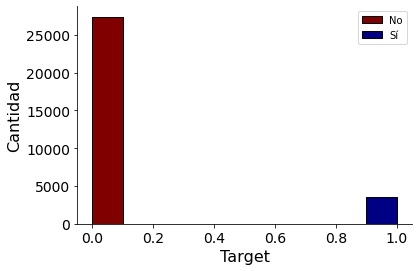

In [18]:
from matplotlib.patches import Rectangle

N, bins, patches = plt.hist(preprocessed_dataset["y"], ec="k")

cmap = plt.get_cmap('jet')
low = cmap(1.1)
high = cmap(1)


for i in range(0,4):
    patches[i].set_facecolor(low)
for i in range(4,10):
    patches[i].set_facecolor(high)

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,high]]

labels= ["No","Sí"]
plt.legend(handles, labels)


plt.xlabel("Target", fontsize=16)  
plt.ylabel("Cantidad", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

Nota: Se aprecia un desbalanceo en el target

In [19]:
#Creación de bins
#Nota: No ejecutar (se preparó para futura experimentación de tunning)
def create_bins(df, column, bins_dict):
  bins_list = bins_dict["bins_list"]
  bins_number = bins_dict["bins_number"]

  if (bins_list):
    data_for_bins = pd.cut(df[column], bins=bins_list, precision=0, duplicates="drop")

  else:
    data_for_bins = df[column]

    min_value = data_for_bins.min()
    max_value = data_for_bins.max()

    repetitions_of_min_value = len(data_for_bins[data_for_bins == min_value])
    repetitions_of_max_value = len(data_for_bins[data_for_bins == max_value])

    if repetitions_of_min_value > 1:
      #Si el valor mínimo se repite entonces agregamos un valor mínimo falso para balancear mejor los quantiles
      data_for_bins = data_for_bins.append(pd.Series([min_value - 1]), ignore_index=True)

    if repetitions_of_max_value > 1:
      #Si el valor máximo se repite entonces agregamos un valor máximo falso para balancear mejor los quantiles
      data_for_bins = data_for_bins.append(pd.Series([max_value + 1]), ignore_index=True)
    
    #Se usa duplicates="drop" por si los límites de los bins se repiten. No sucederá este caso para el primer y último bin 
    quantiles = pd.qcut(data_for_bins, q=bins_number, precision=0, duplicates="drop")
    
    data_for_bins = quantiles

    if repetitions_of_max_value > 1:
      #Eliminamos el valor máximo que introducimos
      data_for_bins = data_for_bins[:-1]
    
    if repetitions_of_min_value > 1:
      #Eliminamos el valor máximo que introducimos
      data_for_bins = data_for_bins[:-1]

  dictionary_of_intervals = dict()

  for index, interval in enumerate(data_for_bins.cat.categories):
    dictionary_of_intervals[interval] = int(index)
    
  df.reset_index(drop=True, inplace=True)

  bins_column = "Bins_for_" + column

  #df.drop([column], axis=1, inplace=True)

  df[bins_column + "_index"] = data_for_bins

  df.replace({bins_column + "_index": dictionary_of_intervals}, inplace=True)
  print("Bins for "+ column +" Created")

In [45]:
#Creación de bins
#Nota: No ejecutar (se preparó para futura experimentación de tunning)
bins_dict = {
    "Edad": {"bins_number": 0, "bins_list": [0,20,30,40,50,70,100]},
	  "Duracion": {"bins_number": 5, "bins_list": []},
	  "Llamadas": {"bins_number": 4, "bins_list": []},
	  "indicador macro": {"bins_number": 5, "bins_list": []}
}

In [49]:
#Creación de bins
#Nota: No ejecutar (se preparó para futura experimentación de tunning)
for column, bins_list in bins_dict.items():
  create_bins(preprocessed_dataset, column, bins_list)

In [50]:
preprocessed_dataset.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_high.school,education_superior,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
10685,52,0,0,0,1,5,1,11.27,2,5.99207,0,1,1.4,94.465,-41.8,4.961,5228.1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
224,40,0,0,0,1,4,0,2.80,1,5.99207,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
29638,28,0,1,0,0,3,0,3.12,1,5.99207,0,1,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4804,52,0,0,0,1,4,2,1.13,1,5.99207,0,1,1.1,93.994,-36.4,4.858,5191.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
11614,35,0,0,0,1,5,4,1.35,2,5.99207,0,1,1.4,94.465,-41.8,4.959,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## **5ta Sección: Modelamiento**

In [91]:
df2 = dataset_test.copy()

In [92]:
df2 = replace_unknown(df2)

In [93]:
#Imputación de valores del entrenamiento
for u in get_unknown_colums(df2):
  df2[u].replace('unknown', df1[u].mode()[0], inplace=True)

Columna "job" tiene 48 entradas unknown.
Columna "marital" tiene 20 entradas unknown.
Columna "education" tiene 352 entradas unknown.
Columna "default" tiene 2166 entradas unknown.
Columna "housing" tiene 256 entradas unknown.
Columna "loan" tiene 256 entradas unknown.


In [94]:
#Transformamos los datos a valores numéricos
preprocessed_dataset_test = preprocess_dataset(df2)

print("\n >", "-"*10, "Tipo de datos", "-"*10, "< \n")
preprocessed_dataset_test.dtypes

Para la columna 'default', la codificación fue: {0: 'no', 1: 'yes'}
Para la columna 'housing', la codificación fue: {0: 'no', 1: 'yes'}
Para la columna 'loan', la codificación fue: {0: 'no', 1: 'yes'}
Para la columna 'contact', la codificación fue: {0: 'cellular', 1: 'telephone'}
Para la columna 'poutcome', la codificación fue: {0: 'failure', 1: 'nonexistent', 2: 'success'}
Para la columna 'y', la codificación fue: {0: 'no', 1: 'yes'}

 > ---------- Tipo de datos ---------- < 



age                        int64
default                    int64
housing                    int64
loan                       int64
contact                    int64
month                      int64
day_of_week                int64
duration                 float64
campaign                   int64
poutcome                   int64
emp.var.rate             float64
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed              float64
y                          int64
education_high.school      uint8
education_superior         uint8
job_blue-collar            uint8
job_entrepreneur           uint8
job_housemaid              uint8
job_management             uint8
job_retired                uint8
job_self-employed          uint8
job_services               uint8
job_student                uint8
job_technician             uint8
job_unemployed             uint8
marital_married            uint8
marital_single             uint8
dtype: obj

In [55]:
preprocessed_dataset_test.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_high.school,education_superior,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
15500,39,0,1,0,0,6,4,10.58,3,6.081579,0,1,1.4,93.918,-42.7,4.957,5228.1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
29034,55,0,1,0,0,3,4,4.13,2,6.081579,0,1,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11199,39,0,0,0,1,5,3,3.45,1,6.081579,0,1,1.4,94.465,-41.8,4.961,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
22247,56,0,1,0,0,7,3,2.93,7,6.081579,0,1,1.4,93.444,-36.1,4.963,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
27180,49,0,1,0,0,10,4,4.52,1,6.081579,0,1,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [68]:
#Creación de bins
#Nota: No ejecutar (se preparó para futura experimentación de tunning)
for column, bins_list in bins_dict.items():
  create_bins(preprocessed_dataset_test, column, bins_list)

## Model Parameters


In [95]:
x_train = preprocessed_dataset.drop(['y'], axis = 1).values
y_train = preprocessed_dataset['y'].values

x_test = preprocessed_dataset_test.drop(['y'], axis = 1).values
y_test = preprocessed_dataset_test['y'].values

In [96]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

#Probamos con 5 modelos
clf1 = RandomForestClassifier(n_estimators =  100,  n_jobs=-1, random_state = 5)
clf2 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, random_state = 5)
clf3 = XGBClassifier(nthreads = -1, random_state = 5)
clf4 = AdaBoostClassifier(random_state = 5)
clf5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1, ), random_state=5, max_iter=100)
clf6 = LGBMClassifier(n_estimators=100, random_state=5, max_depth=-1)

classifiers = [
               ('RandomForest', clf1), ('GradientBoost', clf2), 
               ('XGBoost', clf3), ('AdaBoost', clf4),  
               ('RNN', clf5), ('LGBM', clf6)      
               ]

for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    
    confusion_matrix = metrics.confusion_matrix(y_train, clf.predict(x_train))
    TN = confusion_matrix[0,0]
    FN = confusion_matrix[1,0]
    FP = confusion_matrix[0,1]
    TP = confusion_matrix[1,1]
    exactitud = (TP + TN)/ (TP + TN + FP + FN)
    precision = TP/ (TP + FP)
    sensibilidad = TP/ (TP + FN)


    print("{:3} classifier:\n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f} \n \
        \tAUC score: {:<8.5f}\n \
        \tExactitud: {:.3f}\n \
        \tPrecisión: {:.3f}\n \
        \tSensibilidad: {:.3f}\n" 
        .format(clf_name, 
                clf.score(x_train, y_train), 
                clf.score(x_test, y_test),
                roc_auc_score(y_test, y_pred_proba),
                exactitud, precision, sensibilidad
                ))

RandomForest classifier:
         	train accuracy: 1.00
         	test accuracy: 0.91 
         	AUC score: 0.94548 
         	Exactitud: 1.000
         	Precisión: 1.000
         	Sensibilidad: 1.000

GradientBoost classifier:
         	train accuracy: 0.92
         	test accuracy: 0.92 
         	AUC score: 0.95073 
         	Exactitud: 0.920
         	Precisión: 0.694
         	Sensibilidad: 0.534

XGBoost classifier:
         	train accuracy: 0.92
         	test accuracy: 0.92 
         	AUC score: 0.95175 
         	Exactitud: 0.919
         	Precisión: 0.692
         	Sensibilidad: 0.514

AdaBoost classifier:
         	train accuracy: 0.91
         	test accuracy: 0.91 
         	AUC score: 0.94230 
         	Exactitud: 0.908
         	Precisión: 0.664
         	Sensibilidad: 0.387

RNN classifier:
         	train accuracy: 0.89
         	test accuracy: 0.89 
         	AUC score: 0.50000 
         	Exactitud: 0.886
         	Precisión: nan
         	Sensibilidad: 0.000

LGBM clas

In [71]:
from sklearn import metrics

def print_binary_confusion_matrix(y_true, y_pred):
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  TN = confusion_matrix[0,0]
  FN = confusion_matrix[1,0]
  FP = confusion_matrix[0,1]
  TP = confusion_matrix[1,1]
  exactitud = (TP + TN)/ (TP + TN + FP + FN)
  precision = TP/ (TP + FP)
  exhaustividad = TP/ (TP + FN)
  
  exhaustividad = TP/ (TP + FN)

  print ('              +-----------------+')
  print ('              |   Predicción    |')
  print ('              +-----------------+')
  print ('              |    +   |    -   |')
  print ('+-------+-----+--------+--------+')
  print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
  print ('| real  +-----+--------+--------+')
  print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
  print ('+-------+-----+--------+--------+')
  print('Exactitud     : {:.3f}'.format(exactitud))
  print('Precisión     : {:.3f}'.format(precision))
  print('Exhaustividad : {:.3f}'.format(exhaustividad))
  print()

In [72]:
#Vemos la matriz de confusión para el RF
print('Conjunto de entrenamiento RF:')
print_binary_confusion_matrix(y_train, clf1.predict(x_train))

print('Conjunto de prueba RF:')
print_binary_confusion_matrix(y_test, clf1.predict(x_test))

Conjunto de entrenamiento RF:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   3482 |      0 |
| real  +-----+--------+--------+
|       |  -  |      0 |  27179 |
+-------+-----+--------+--------+
Exactitud     : 1.000
Precisión     : 1.000
Exhaustividad : 1.000

Conjunto de prueba RF:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    657 |    501 |
| real  +-----+--------+--------+
|       |  -  |    397 |   8670 |
+-------+-----+--------+--------+
Exactitud     : 0.912
Precisión     : 0.623
Exhaustividad : 0.567



Nota: se ve los parámetros de precisión y exhaustividad bajos. El modelo esta overfiteado

In [193]:
#Probaremos con la técnica de oversampling SMOTE
#Código adaptado de https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

from collections import Counter
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
print('Dimensión del dataset original %s' % Counter(y_train))
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print('Dimensión del dataset remuestreado %s' % Counter(y_train_res))

Dimensión del dataset original Counter({0: 27179, 1: 3482})
Dimensión del dataset remuestreado Counter({1: 27179, 0: 27179})


In [59]:
#Volvemos a entrenar con el dataset remuestrado

for clf_name, clf in classifiers:

    clf.fit(x_train_res, y_train_res)
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    confusion_matrix = metrics.confusion_matrix(y_train_res, clf.predict(x_train_res))
    TN = confusion_matrix[0,0]
    FN = confusion_matrix[1,0]
    FP = confusion_matrix[0,1]
    TP = confusion_matrix[1,1]
    exactitud = (TP + TN)/ (TP + TN + FP + FN)
    precision = TP/ (TP + FP)
    sensibilidad = TP/ (TP + FN)

    print("{:3} classifier:\n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}\n\
        \tAUC score: {:<8.5f}\n \
        \tExactitud: {:.3f}\n \
        \tPrecisión: {:.3f}\n \
        \tSensibilidad: {:.3f}\n"         
        .format(clf_name, 
                clf.score(x_train_res, y_train_res), 
                clf.score(x_test, y_test),
                roc_auc_score(y_test, y_pred_proba),
                exactitud, precision, sensibilidad
                ))

RandomForest classifier:
         	train accuracy: 1.00
         	test accuracy: 0.91
        	AUC score: 0.94066 
         	Exactitud: 1.000
         	Precisión: 1.000
         	Sensibilidad: 1.000

GradientBoost classifier:
         	train accuracy: 0.94
         	test accuracy: 0.91
        	AUC score: 0.94491 
         	Exactitud: 0.943
         	Precisión: 0.934
         	Sensibilidad: 0.954

XGBoost classifier:
         	train accuracy: 0.94
         	test accuracy: 0.90
        	AUC score: 0.94358 
         	Exactitud: 0.943
         	Precisión: 0.932
         	Sensibilidad: 0.955

AdaBoost classifier:
         	train accuracy: 0.93
         	test accuracy: 0.90
        	AUC score: 0.93232 
         	Exactitud: 0.930
         	Precisión: 0.936
         	Sensibilidad: 0.925

RNN classifier:
         	train accuracy: 0.50
         	test accuracy: 0.89
        	AUC score: 0.50000 
         	Exactitud: 0.500
         	Precisión: nan
         	Sensibilidad: 0.000

LGBM classifier:
  

## Búsqueda de los mejores parámetros

In [106]:
# random
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
max_features = ['auto', 8, 10, 12, None]  # 'auto' equivale a 'sqrt'; None equivale a todas las 15
max_depth = [10, 20, 50, None, -1]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}


classifiers = [
               ('RandomForest', clf1), ('GradientBoost', clf2), 
               ('XGBoost', clf3), ('LGBM', clf6)   
               ]

for clf_name, clf in classifiers:
    print(clf_name, "\n")
    model = RandomizedSearchCV(estimator = clf, 
                               param_distributions = random_grid, 
                               n_iter = 18, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )

    search = model.fit(x_train, y_train)
    print(search.best_params_, "\n")

RandomForest 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  5.3min finished


{'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 12, 'max_depth': 10} /n
GradientBoost 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 15.4min finished


{'n_estimators': 300, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 20} /n
XGBoost 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 14.2min finished


{'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 12, 'max_depth': 10} /n
LGBM 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.0min finished


{'n_estimators': 233, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 10} /n


In [84]:
param_dist = {
 'n_estimators': n_estimators,
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

classifiers_1 = [('AdaBoost', clf4)]

for clf_name, clf in classifiers_1:
    print(clf_name, "\n")
    model = RandomizedSearchCV(estimator = clf, 
                               param_distributions = param_dist, 
                               n_iter = 18, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )

    search = model.fit(x_train, y_train)
    print(search.best_params_, "/n")

AdaBoost 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  4.9min finished


{'n_estimators': 466, 'learning_rate': 0.3} /n


In [79]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

classifiers_2 = [('RNN', clf5)]

for clf_name, clf in classifiers_2:
    print(clf_name, "\n")
    model = RandomizedSearchCV(estimator = clf, 
                               param_distributions = parameter_space, 
                               n_iter = 18, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )

    search = model.fit(x_train, y_train)
    print(search.best_params_, "/n")

    model_hiper_params[clf_name] = search.best_params_

RNN 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  6.0min finished


{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'relu'} /n


In [195]:
dict_hyper_params_model = {
    'RandomForest' : {'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 12, 'max_depth': 10},
    'GradientBoost': {'n_estimators': 333, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 50},
    'XGBoost' : {'n_estimators': 233, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 10},
    'AdaBoost' : {'n_estimators': 466, 'learning_rate': 0.3},
    'RNN' : {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'relu'},
    'LGBM' : {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': -1}    
}

#Probamos con 5 modelos con los nuevos hiperparametros

clf1 = RandomForestClassifier(**dict_hyper_params_model['RandomForest'])
clf2 = GradientBoostingClassifier(**dict_hyper_params_model['GradientBoost'])
clf3 = XGBClassifier(**dict_hyper_params_model['XGBoost'])
clf4 = AdaBoostClassifier(**dict_hyper_params_model['AdaBoost'])
clf5 = MLPClassifier(**dict_hyper_params_model['RNN'])
clf6 = LGBMClassifier(**dict_hyper_params_model['LGBM'])

for clf_name, clf in classifiers:

    clf.fit(x_train_res, y_train_res)
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    confusion_matrix = metrics.confusion_matrix(y_train_res, clf.predict(x_train_res))
    TN = confusion_matrix[0,0]
    FN = confusion_matrix[1,0]
    FP = confusion_matrix[0,1]
    TP = confusion_matrix[1,1]
    exactitud = (TP + TN)/ (TP + TN + FP + FN)
    precision = TP/ (TP + FP)
    sensibilidad = TP/ (TP + FN)

    print("{:3} classifier:\n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}\n\
        \tAUC score: {:<8.5f}\n \
        \tExactitud: {:.3f}\n \
        \tPrecisión: {:.3f}\n \
        \tSensibilidad: {:.3f}\n"         
        .format(clf_name, 
                clf.score(x_train_res, y_train_res), 
                clf.score(x_test, y_test),
                roc_auc_score(y_test, y_pred_proba),
                exactitud, precision, sensibilidad
                ))

RandomForest classifier:
         	train accuracy: 0.95
         	test accuracy: 0.90
        	AUC score: 0.94639 
         	Exactitud: 0.948
         	Precisión: 0.921
         	Sensibilidad: 0.981

GradientBoost classifier:
         	train accuracy: 1.00
         	test accuracy: 0.91
        	AUC score: 0.94214 
         	Exactitud: 1.000
         	Precisión: 1.000
         	Sensibilidad: 1.000

XGBoost classifier:
         	train accuracy: 0.99
         	test accuracy: 0.91
        	AUC score: 0.94542 
         	Exactitud: 0.994
         	Precisión: 0.997
         	Sensibilidad: 0.990

LGBM classifier:
         	train accuracy: 0.97
         	test accuracy: 0.92
        	AUC score: 0.94930 
         	Exactitud: 0.972
         	Precisión: 0.978
         	Sensibilidad: 0.966



Número optimo de características: 16


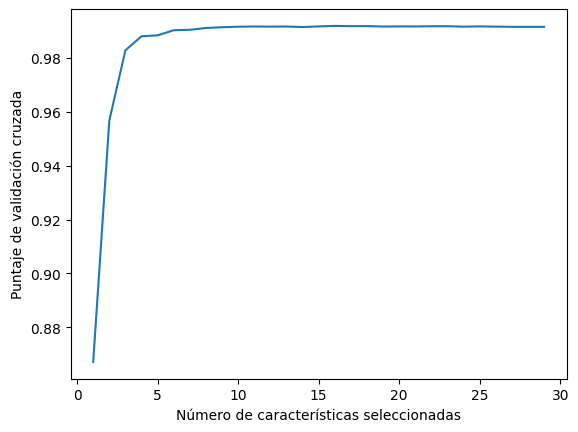

In [188]:
# grafico roc LGBM

#Extraido del NB de clase
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

plt.style.use('default')

rfecv = RFECV(estimator=clf6, step=1, cv=StratifiedKFold(3),
              scoring='roc_auc')
#Buscaremos el mejor AUC
rfecv.fit(x_train_res, y_train_res)

print("Número optimo de características: %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Número de características seleccionadas")
plt.ylabel("Puntaje de validación cruzada")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

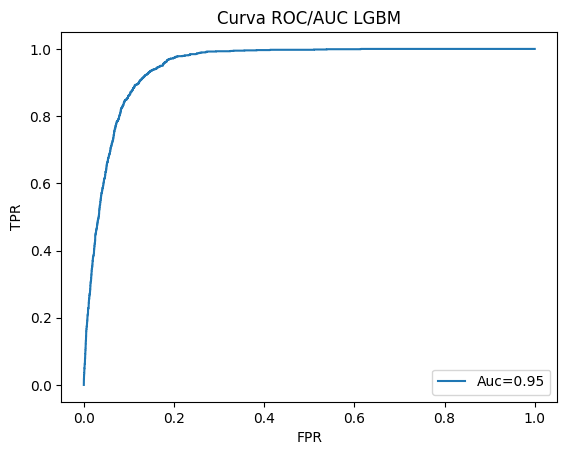

In [192]:
clf6.fit(x_train_res, y_train_res)
y_pred_proba = clf6.predict_proba(x_test)[::,1]

fpr, tpr, th = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.title("Curva ROC/AUC LGBM")
plt.plot(fpr,tpr,label="Auc={:.2f}".format(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

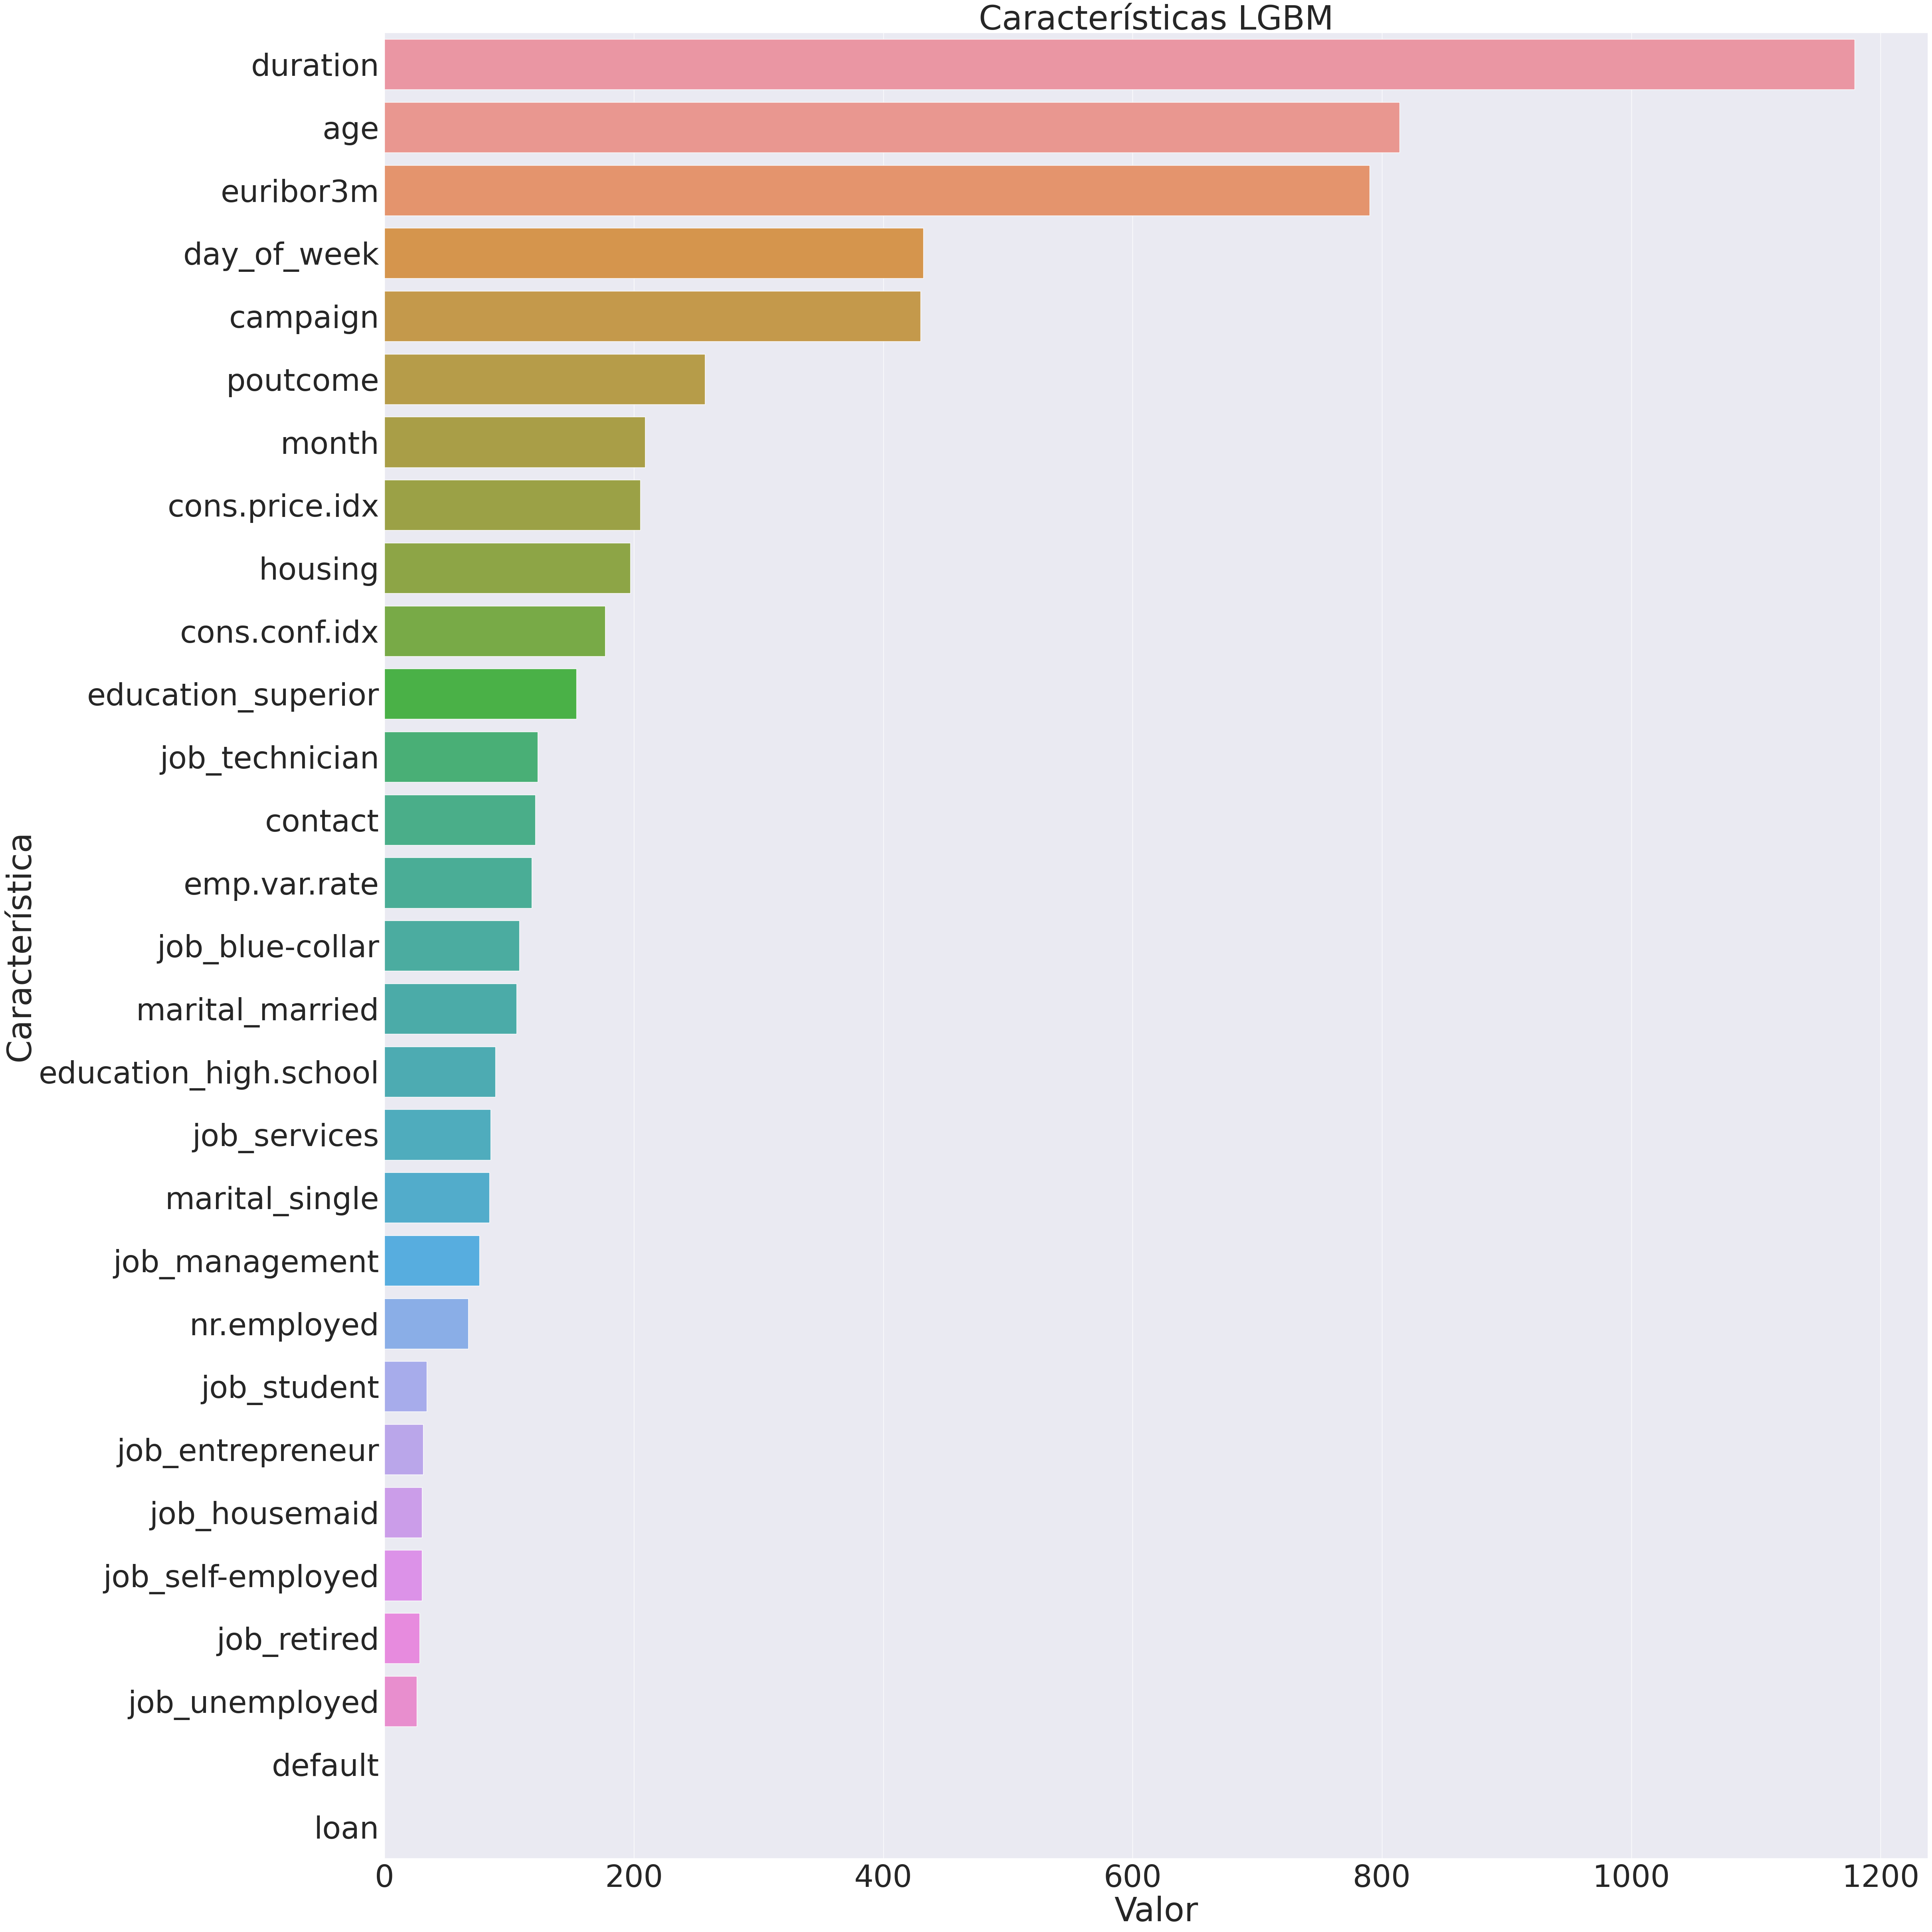

In [184]:
FEATURES = preprocessed_dataset.drop(["y"], axis=1).columns.tolist()
feature_imp = pd.DataFrame({'Value':clf6.feature_importances_,'Feature':FEATURES})

plt.figure(figsize=(50, 50))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:60])
plt.title('Características LGBM')
plt.xlabel("Valor")
plt.ylabel("Característica")
plt.tight_layout()
plt.show()

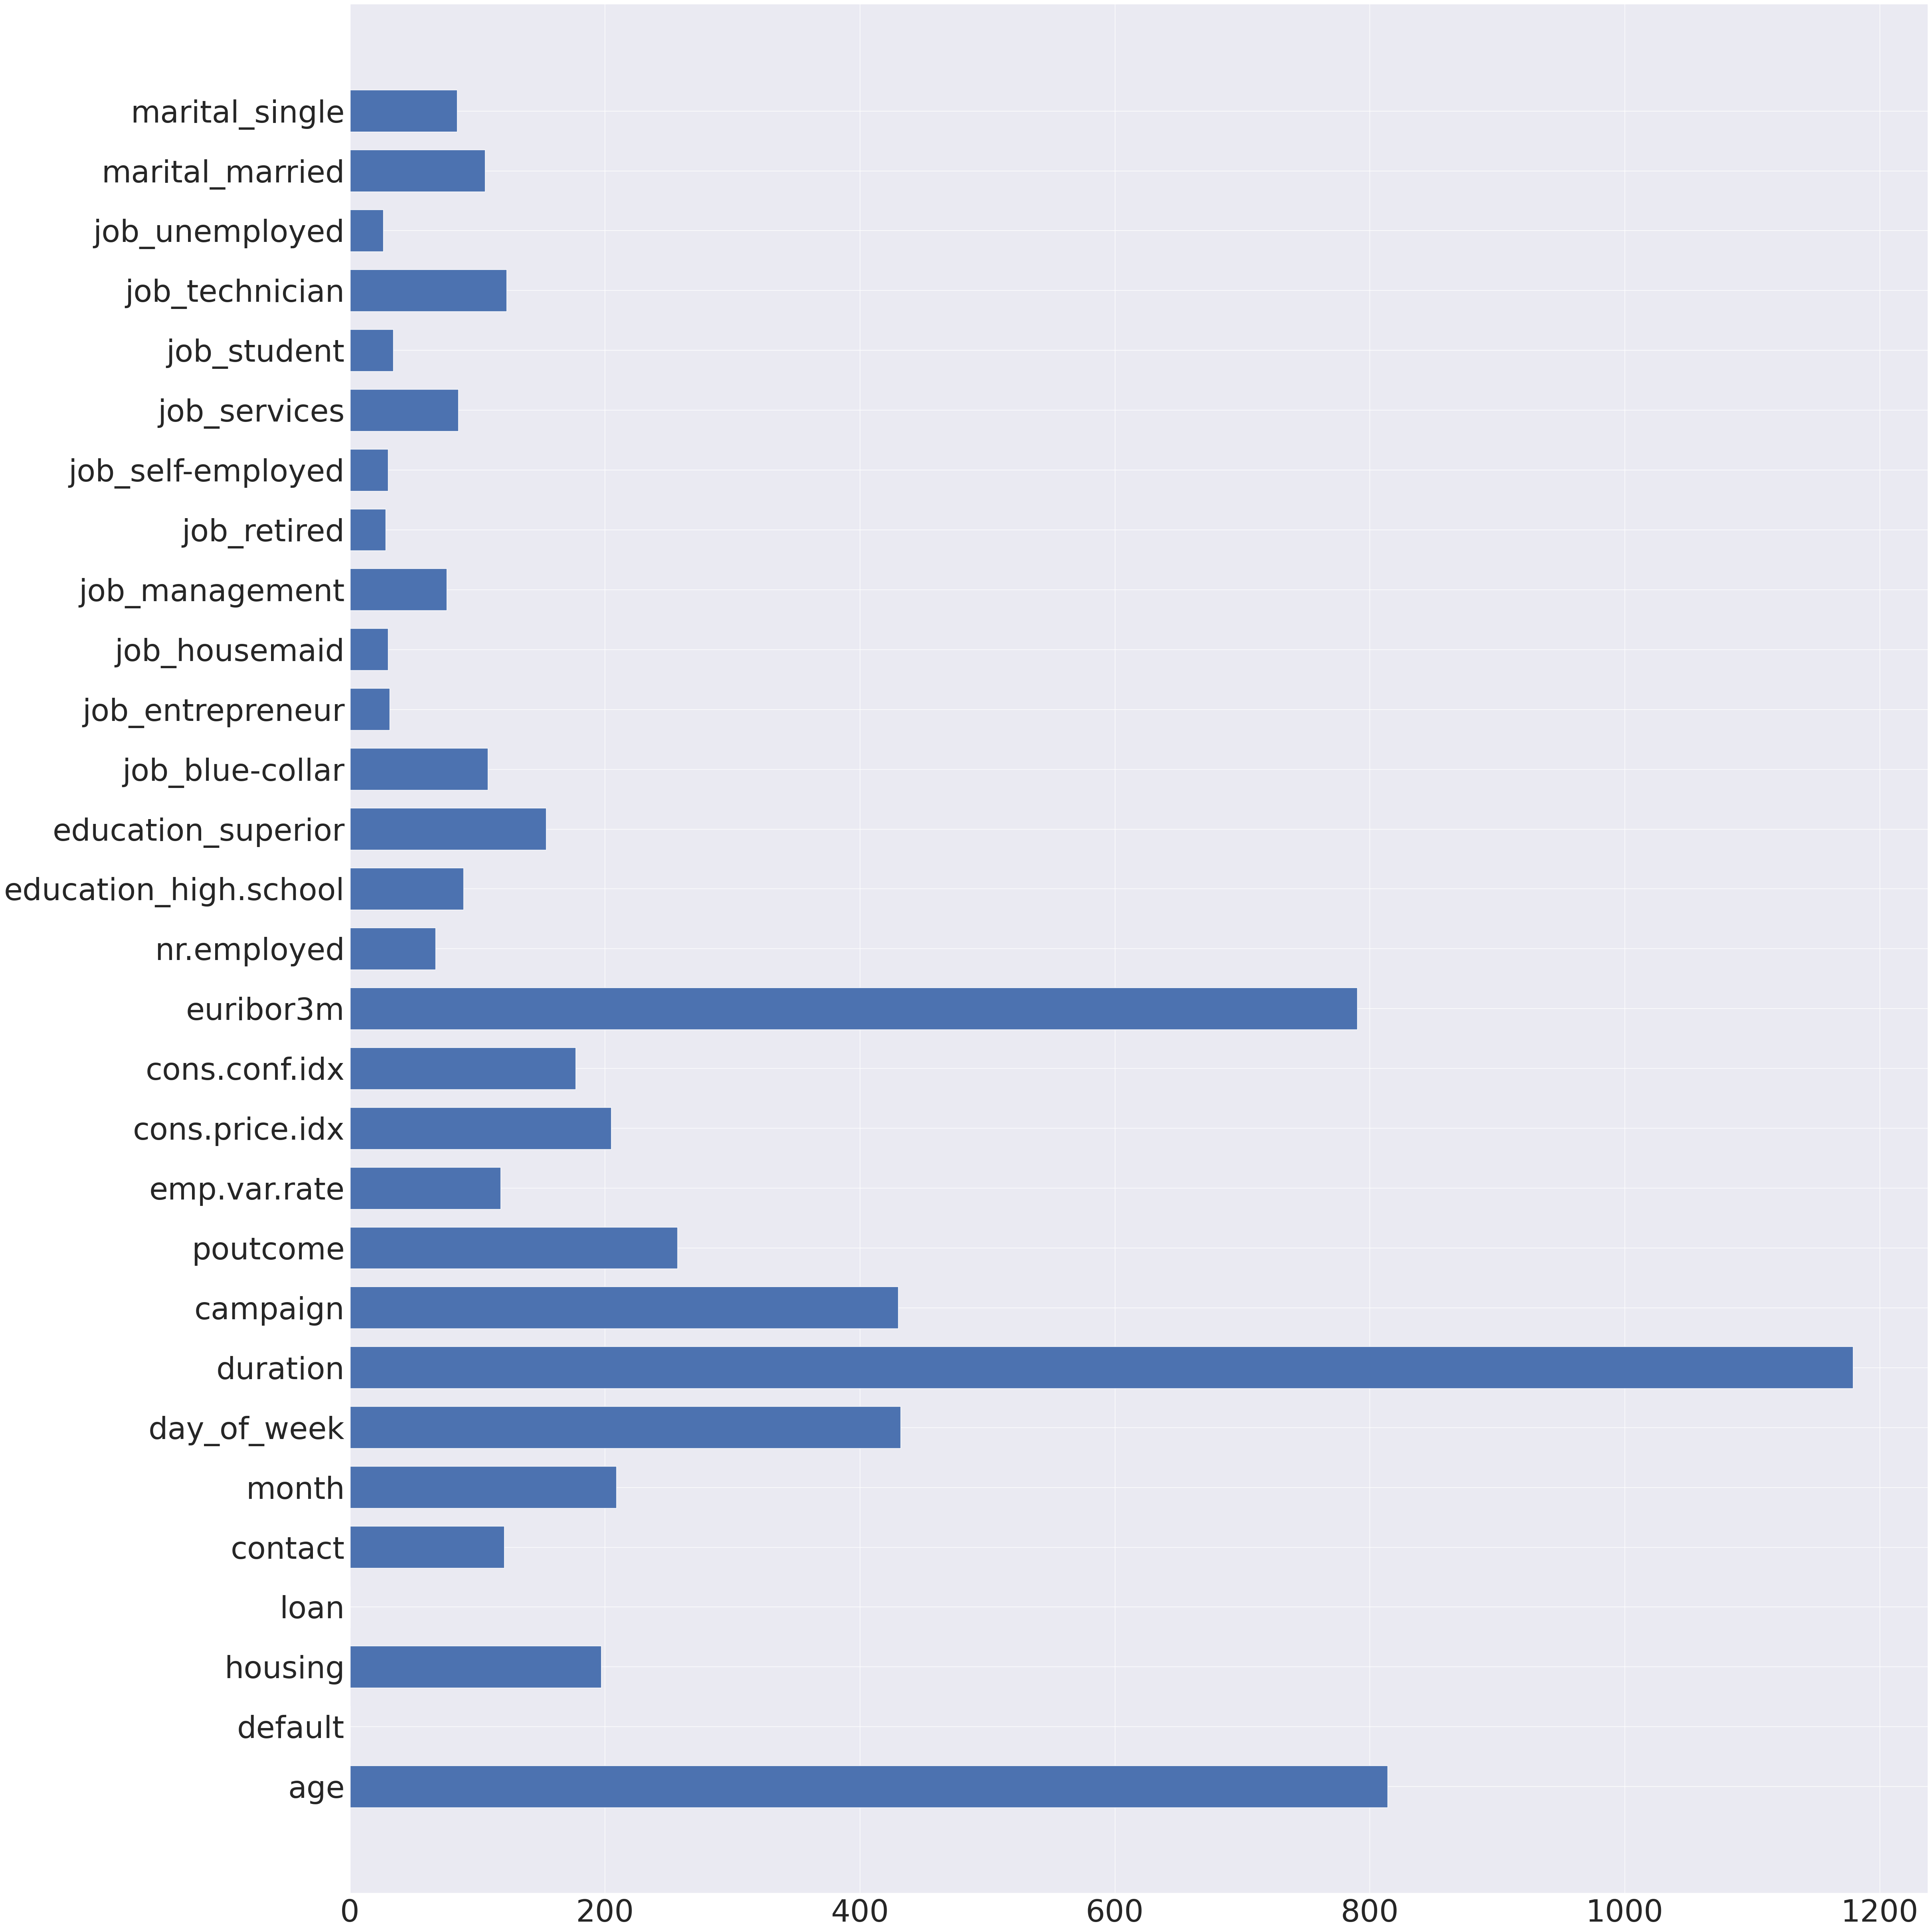

In [186]:
fig = plt.figure(figsize=(50, 50))
plt.barh(FEATURES,
         clf6.feature_importances_,
         height=0.7)
fig.tight_layout()
plt.show()

In [75]:
#Vemos la matriz de confusión para el RF
print('Conjunto de entrenamiento:')
print_binary_confusion_matrix(y_train_res, clf1.predict(x_train_res))

print('Conjunto de prueba :')
print_binary_confusion_matrix(y_test, clf1.predict(x_test))

Conjunto de entrenamiento:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |  27179 |      0 |
| real  +-----+--------+--------+
|       |  -  |      0 |  27179 |
+-------+-----+--------+--------+
Exactitud     : 1.000
Precisión     : 1.000
Exhaustividad : 1.000

Conjunto de prueba :
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    725 |    433 |
| real  +-----+--------+--------+
|       |  -  |    495 |   8572 |
+-------+-----+--------+--------+
Exactitud     : 0.909
Precisión     : 0.594
Exhaustividad : 0.626



In [76]:
#Vemos la matriz de confusión para el XGBOOST
print('Conjunto de entrenamiento:')
print_binary_confusion_matrix(y_train, clf3.predict(x_train))

print('Conjunto de prueba :')
print_binary_confusion_matrix(y_test, clf3.predict(x_test))

Conjunto de entrenamiento:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   2479 |   1003 |
| real  +-----+--------+--------+
|       |  -  |   1886 |  25293 |
+-------+-----+--------+--------+
Exactitud     : 0.906
Precisión     : 0.568
Exhaustividad : 0.712

Conjunto de prueba :
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    859 |    299 |
| real  +-----+--------+--------+
|       |  -  |    674 |   8393 |
+-------+-----+--------+--------+
Exactitud     : 0.905
Precisión     : 0.560
Exhaustividad : 0.742



Optimal number of features : 16


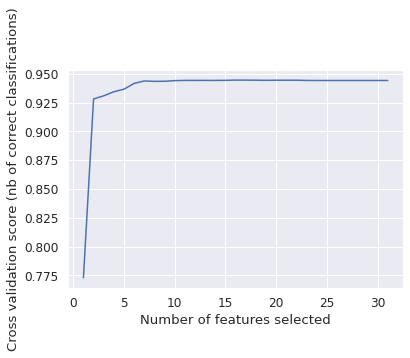

In [77]:
#Extraido del NB de clase
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


rfecv = RFECV(estimator=clf3, step=1, cv=StratifiedKFold(2),
              scoring='roc_auc')
#Buscaremos el mejor AUC
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [78]:
x_train_new = rfecv.transform(x_train)

In [79]:
 clf3.fit(x_train_new, y_train)
 x_test_new = rfecv.transform(x_test)
 clf3.score(x_test_new,y_test)

0.9190220048899755

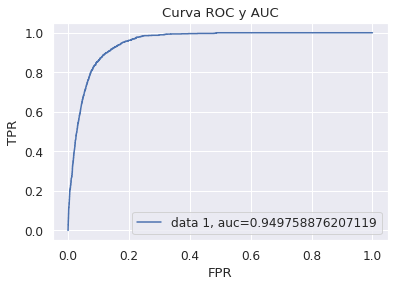

In [80]:
# Cálculo del AUC y gráfica de la Curva ROC
#Tomado del curso de ML

y_pred_proba = clf3.predict_proba(x_test_new)[::,1]
fpr, tpr, th = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.title("Curva ROC y AUC")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

In [99]:
#Probaremos con el modelo de ensamble que nos dió buen resultado en Kaggle
LGBM_parameters = {
    'bagging_freq': 5, #5
    'bagging_fraction': 0.4, #0.4
    'boost_from_average':'false',
    'min_child_samples': 30,
    'boost': 'gbdt',
    'feature_fraction': 0.5, #0.05
    'learning_rate': 0.01, #0.01
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80, #80
    'min_sum_hessian_in_leaf': 10, #10
    'num_leaves': 32, #13
    'num_threads': 16, 
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1,
    "is_unbalance":True, #Con este hiperparámetro no es necesario el SMOTE 
    "random_state":1234,
}

In [100]:
import lightgbm as lgbm

def run_model(train_df, test_df, target_col, LGBM_parameters):
  features  = list(train_df.columns)
  features.remove(target_col)
  target = train_df[target_col]
  folds  = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
  oof    = np.zeros(len(train_df))
  predictions = np.zeros(len(test_df))
  feature_importance_df = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
      print("Fold {}".format(fold_))
      trn_data = lgbm.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
      val_data = lgbm.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

      num_round = 10000
      clf = lgbm.train(LGBM_parameters, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
      oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
      
      fold_importance_df = pd.DataFrame()
      fold_importance_df["Feature"] = features
      fold_importance_df["importance"] = clf.feature_importance()
      fold_importance_df["fold"] = fold_ + 1
      feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
      
      predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

  print("\n CV score: {:<8.5f}".format(roc_auc_score(target, oof)))   
  return predictions, feature_importance_df

In [101]:
train_df = preprocessed_dataset.copy()
test_df  = preprocessed_dataset_test.copy()

predictions, fi_df = run_model(train_df, test_df, "y", LGBM_parameters)

Fold 0
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.963765	valid_1's auc: 0.946121
[2000]	training's auc: 0.973111	valid_1's auc: 0.945455
Early stopping, best iteration is:
[1068]	training's auc: 0.964433	valid_1's auc: 0.946427
Fold 1
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.963325	valid_1's auc: 0.945734
[2000]	training's auc: 0.972812	valid_1's auc: 0.945488
Early stopping, best iteration is:
[1267]	training's auc: 0.966385	valid_1's auc: 0.945973
Fold 2
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.962953	valid_1's auc: 0.950359
Early stopping, best iteration is:
[790]	training's auc: 0.96008	valid_1's auc: 0.950778
Fold 3
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.963012	valid_1's auc: 0.94836
Early stopping, best iteration is:
[830]	training's auc: 0.96073	valid_1's auc: 0.948538
Fold 4
Training until

In [147]:
def features_plot(feature_importance_df):
  cols = (feature_importance_df[["Feature", "importance"]]
          .groupby("Feature")
          .mean()
          .sort_values(by="importance", ascending=False)[:150].index)
  best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

  plt.figure(figsize=(14,28))
  sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
  plt.title('Features importance (averaged/folds)')
  plt.tight_layout()

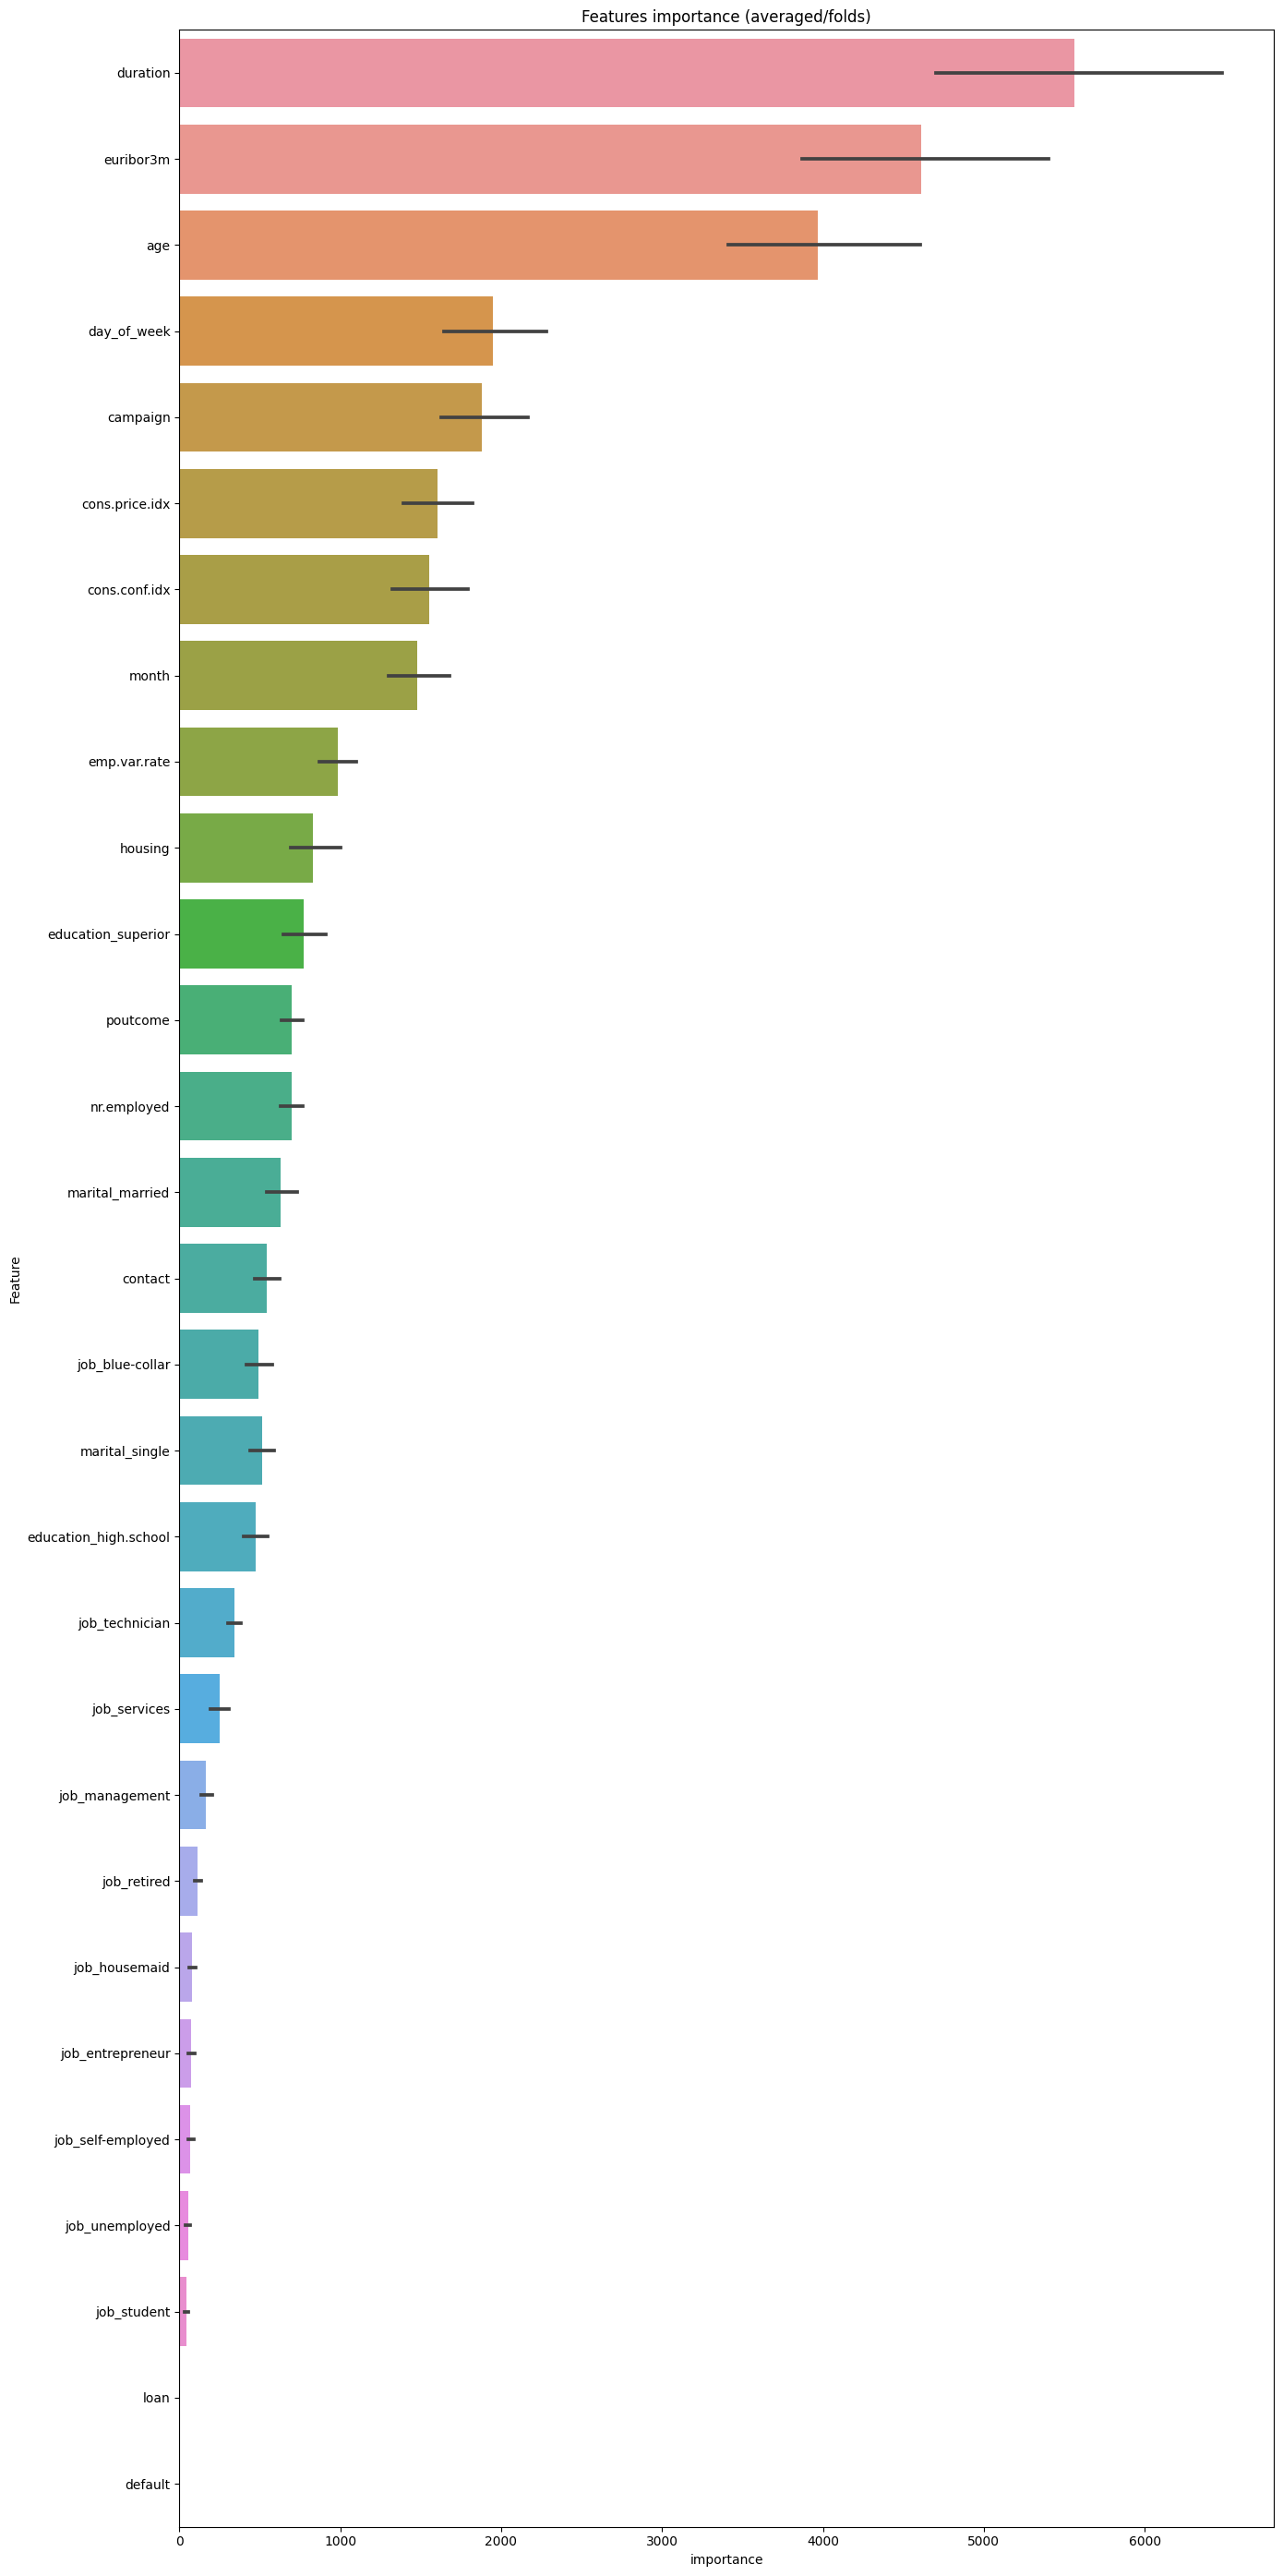

In [148]:
features_plot(fi_df)